In [1]:
from solartwins import *
from condensation_temperature import * 
import random

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [3]:
table= t.copy()

table.remove_column('O')
table.remove_column('C')

elements =[]
elnames = table.columns[3:64]
for n in elnames:
    if len(n) < 3 :
        elements.append(n)

In [4]:
beforetc = []
aftertc = []
for index, element in enumerate(elements):
    abundance_beforetc = np.array(table[element])
    beforetc.append(stdev(abundance_beforetc))
    
    element_temp = []
    for ob in t['star_name']:
        abund = np.array(star_table(ob)['Abundance'])
        con_temp = np.array(star_table(ob)['Condensation Temp'])
        error = np.array(star_table(ob)['Abundance Error'])
        residu = residuals(con_temp, abund, error)
        element_temp.append(residu[index])
    aftertc.append(np.std(element_temp))

In [5]:
zero = np.zeros_like(beforetc)
beforetc =np.array(beforetc)
aftertc =np.array(aftertc)

difference = beforetc - aftertc
increase =[]
for num in difference:
    if num > 0:
        increase.append('decreased')
    elif num < 0:
        increase.append('increased')

In [6]:
Table([elements, beforetc, aftertc, increase]).show_in_notebook()

In [7]:
x0 = (0.73093328, 0.00728066, 0.00833421)
restemp = scipy.optimize.minimize(nlnL, x0, args = (beforetc, aftertc, zero))

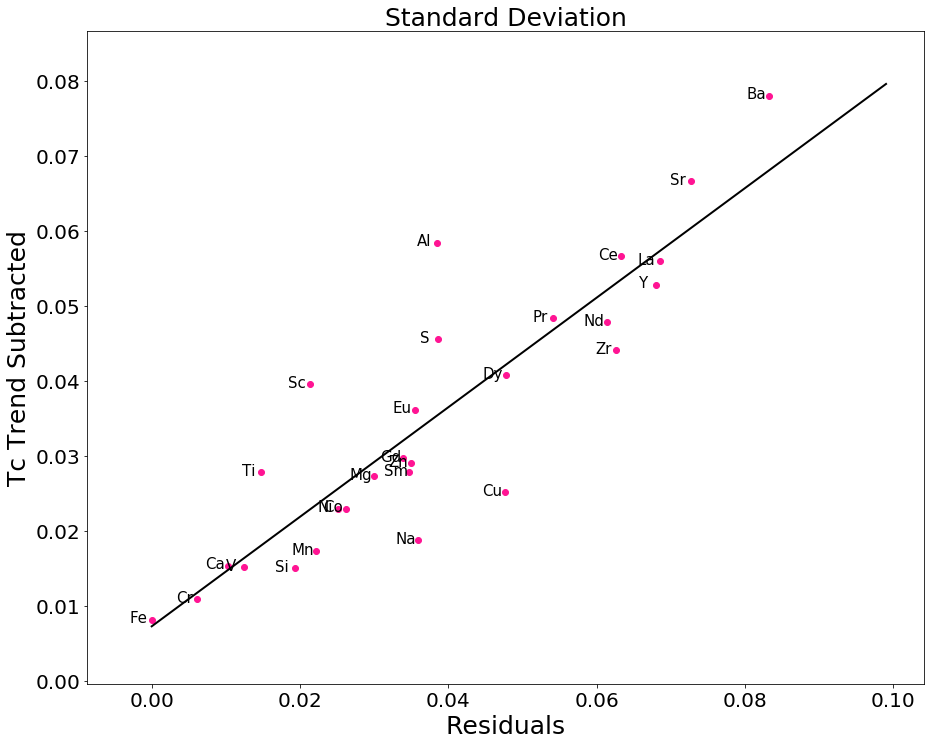

In [8]:
plt.scatter(beforetc, aftertc, c='deeppink') 
plt.xlabel('Residuals',fontsize=25)
plt.ylabel('Tc Trend Subtracted', fontsize=25)
plt.title('Standard Deviation', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= restemp['x']
plot_xs = np.arange(0, .1, .001)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)

for i, txt in enumerate(elements):
    plt.annotate(txt, xy=(beforetc[i], aftertc[i]), xytext=(-13,-6), textcoords='offset points', ha='center', 
                 va='bottom', fontsize=15)
plt.savefig('standarddeviations.png')

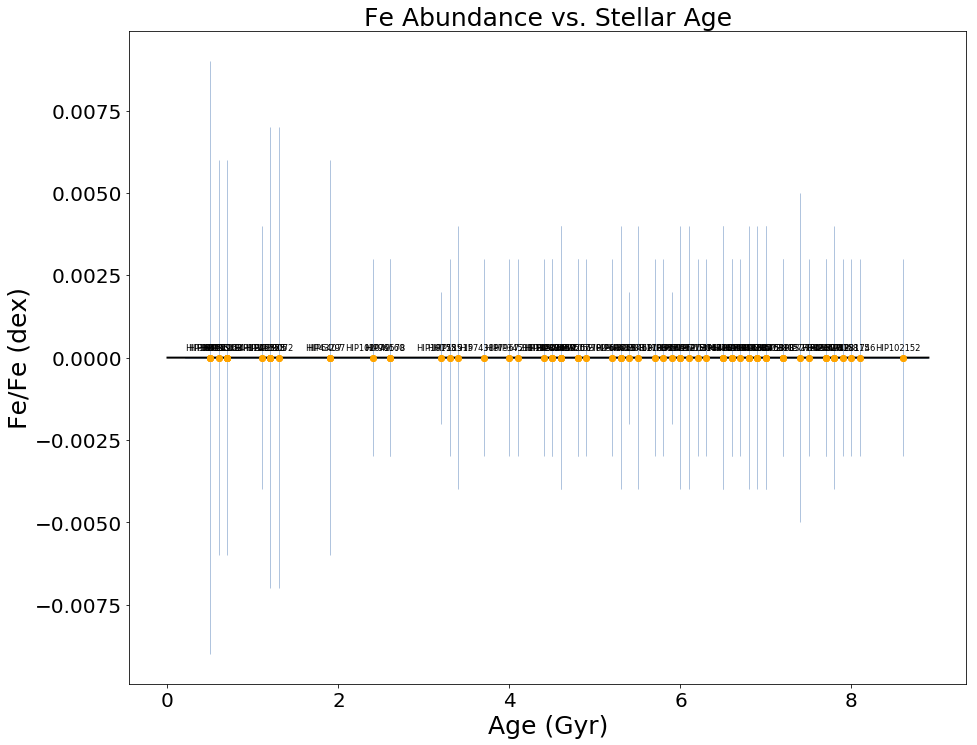

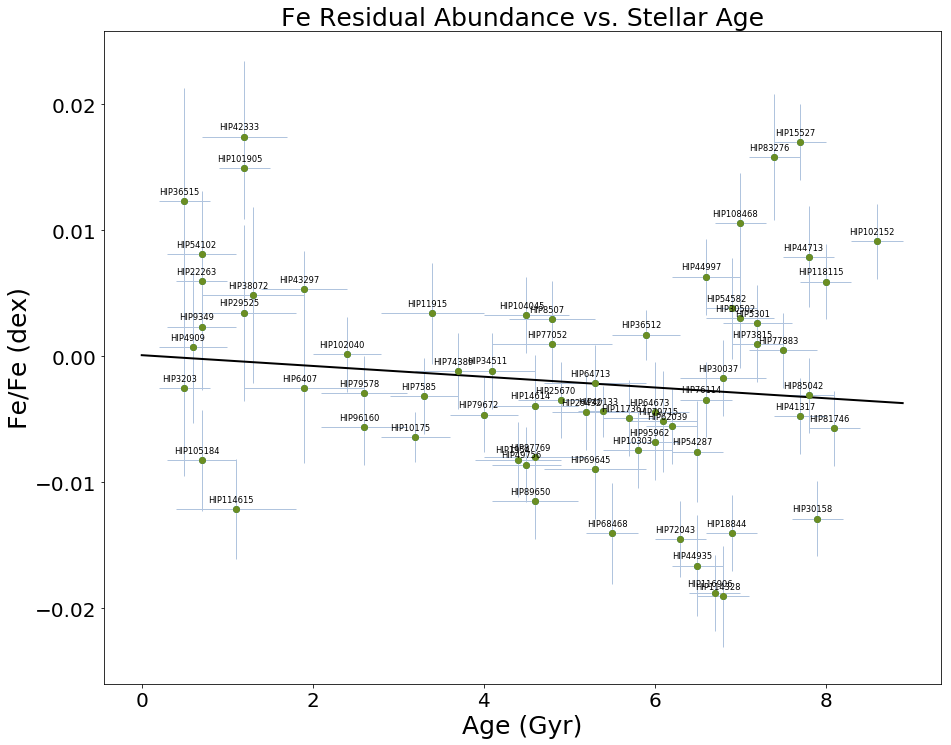

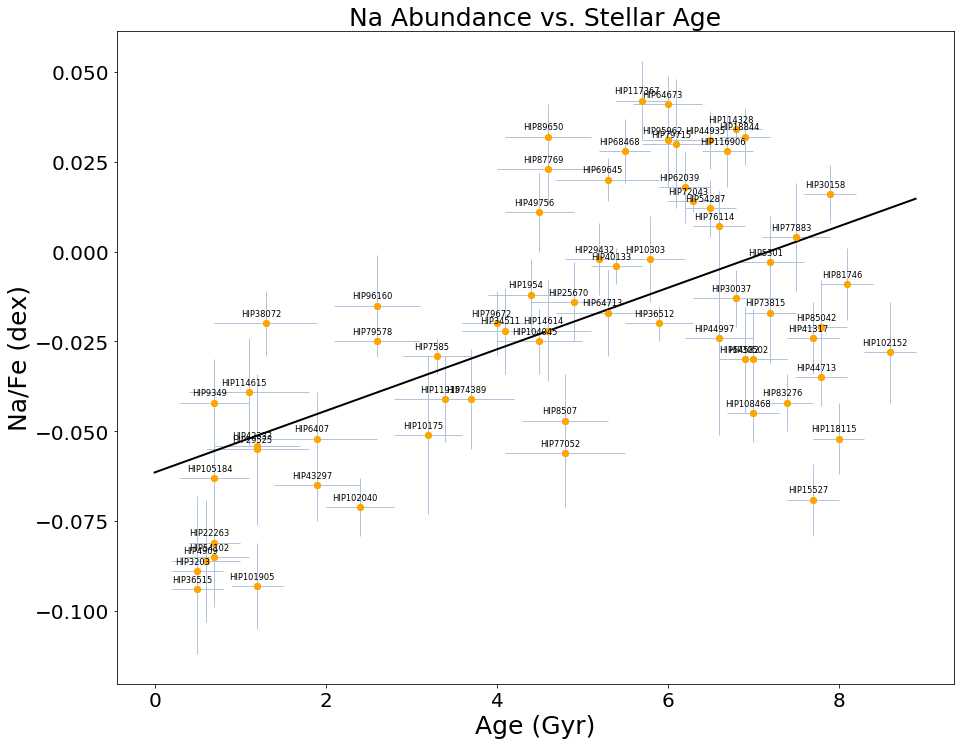

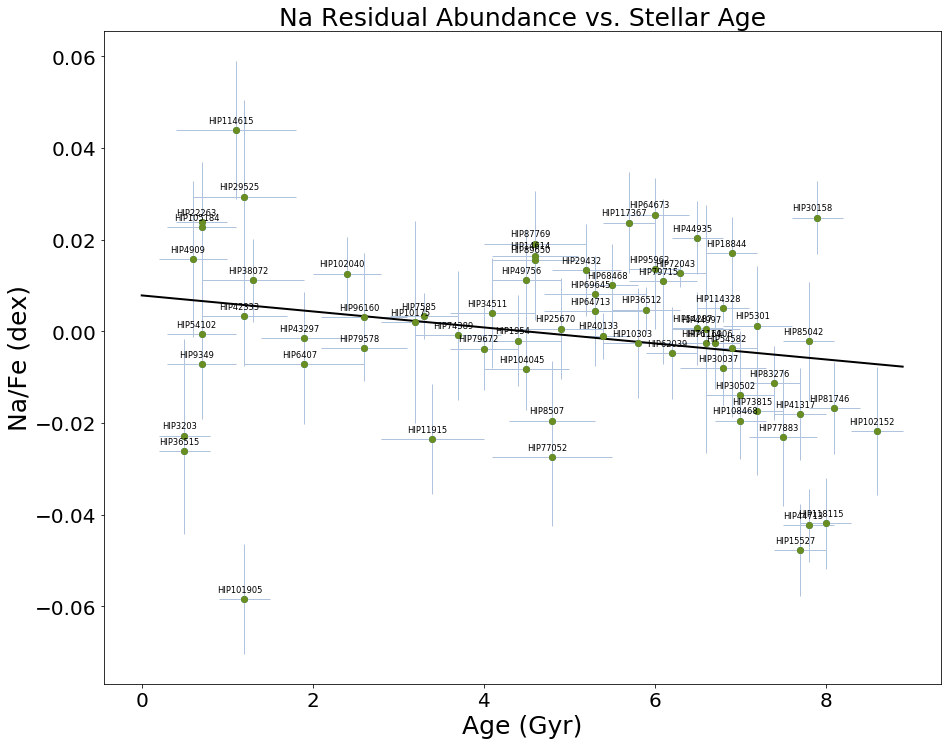

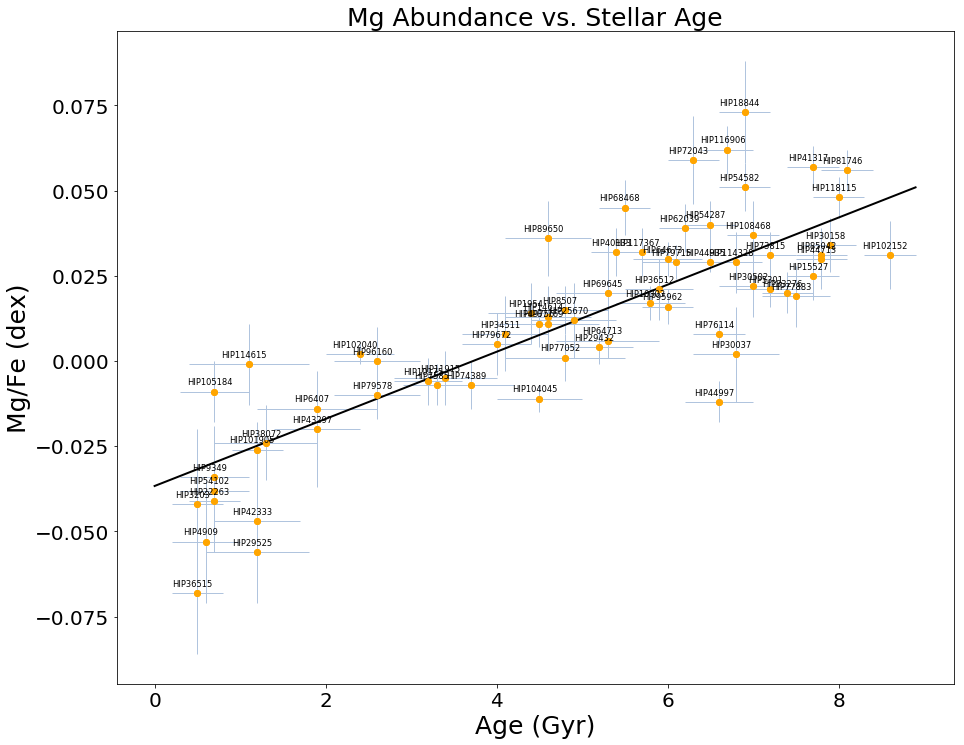

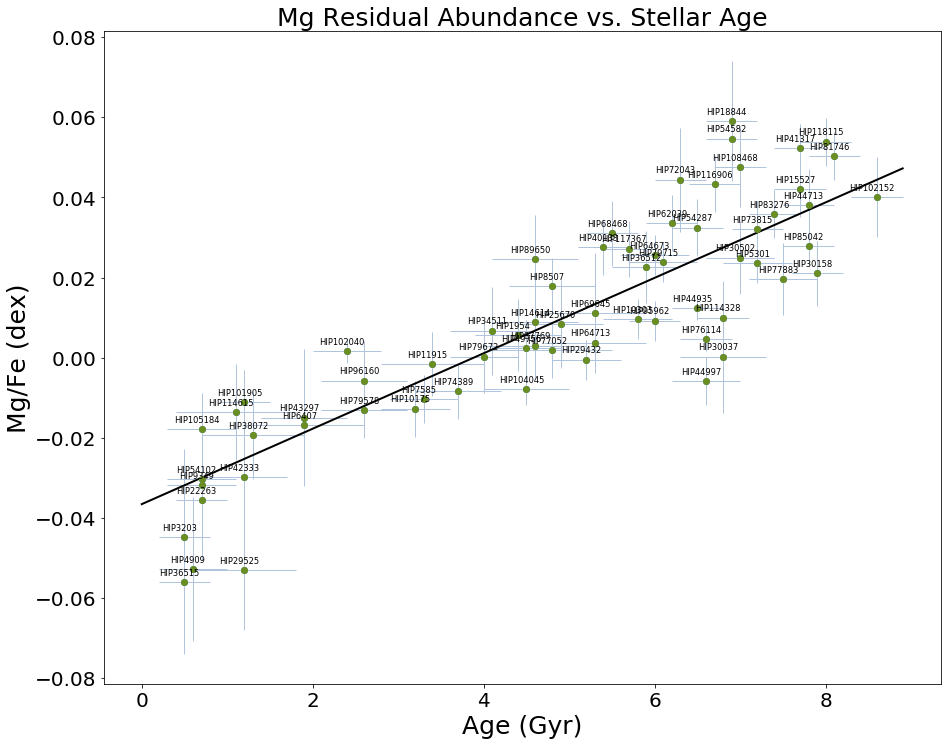

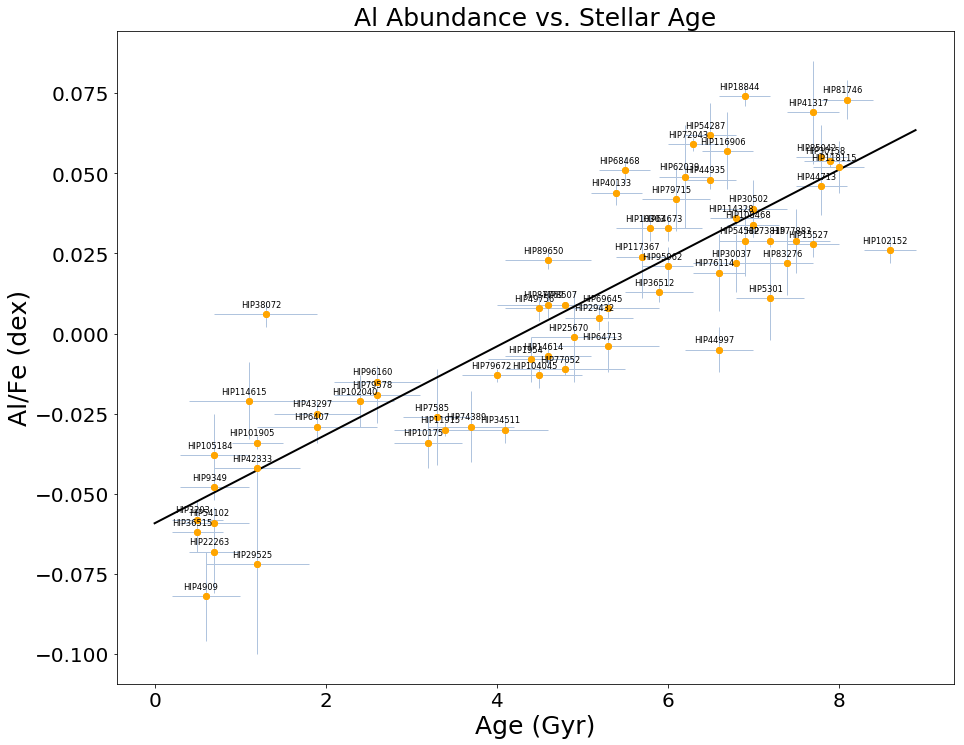

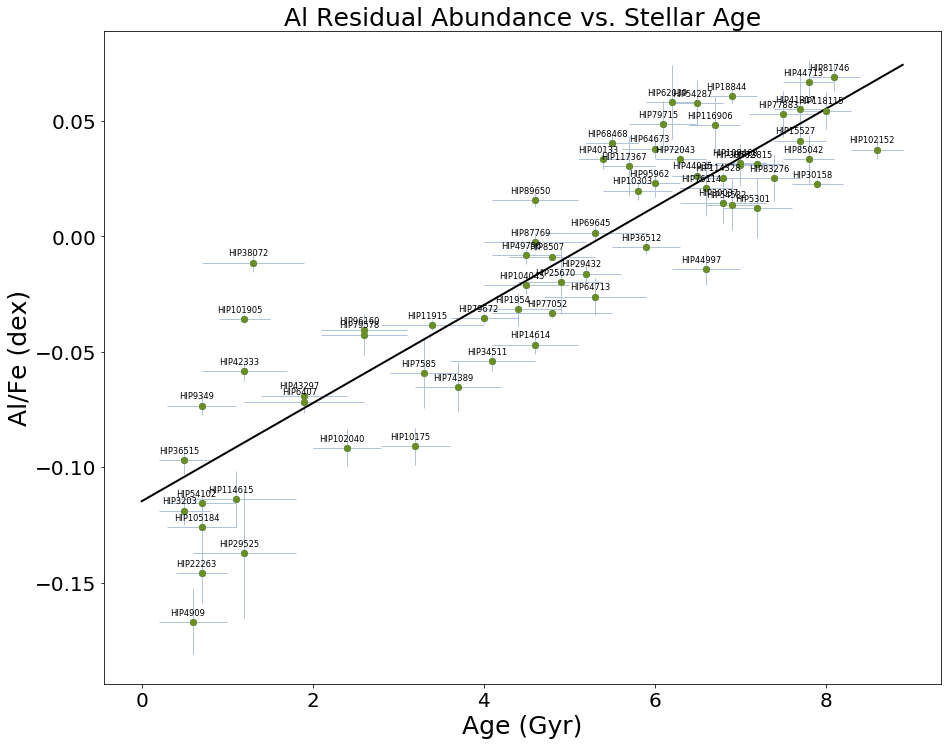

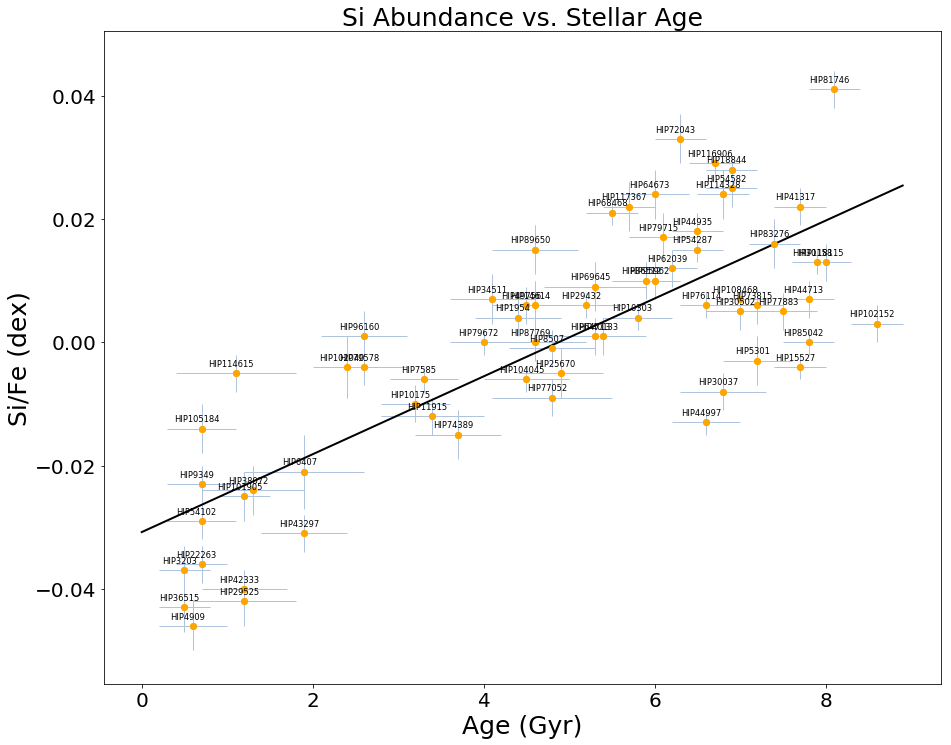

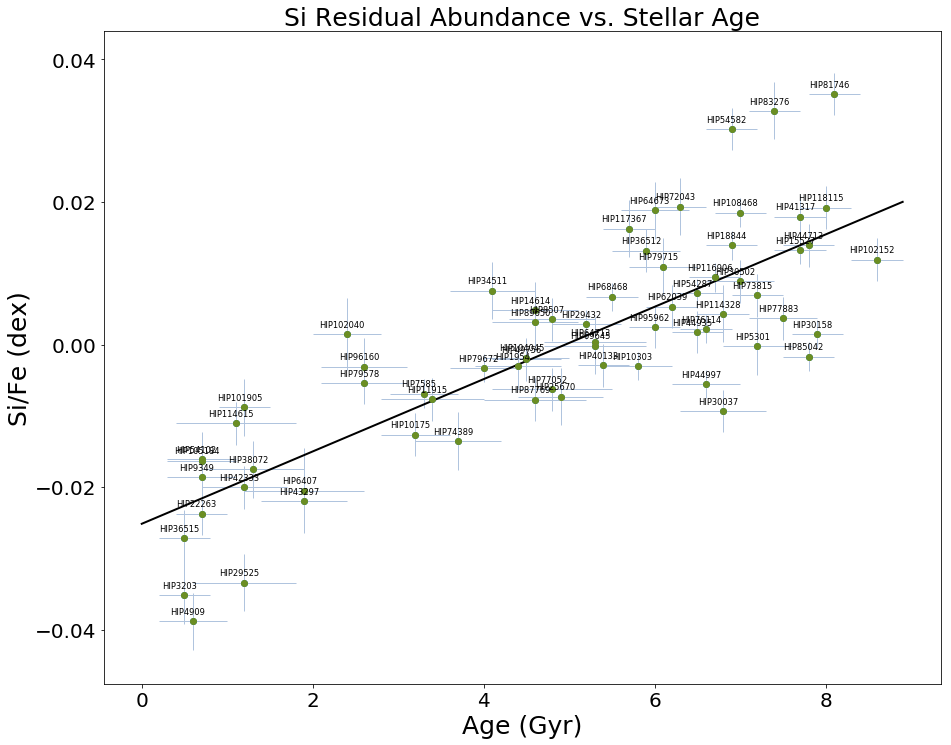

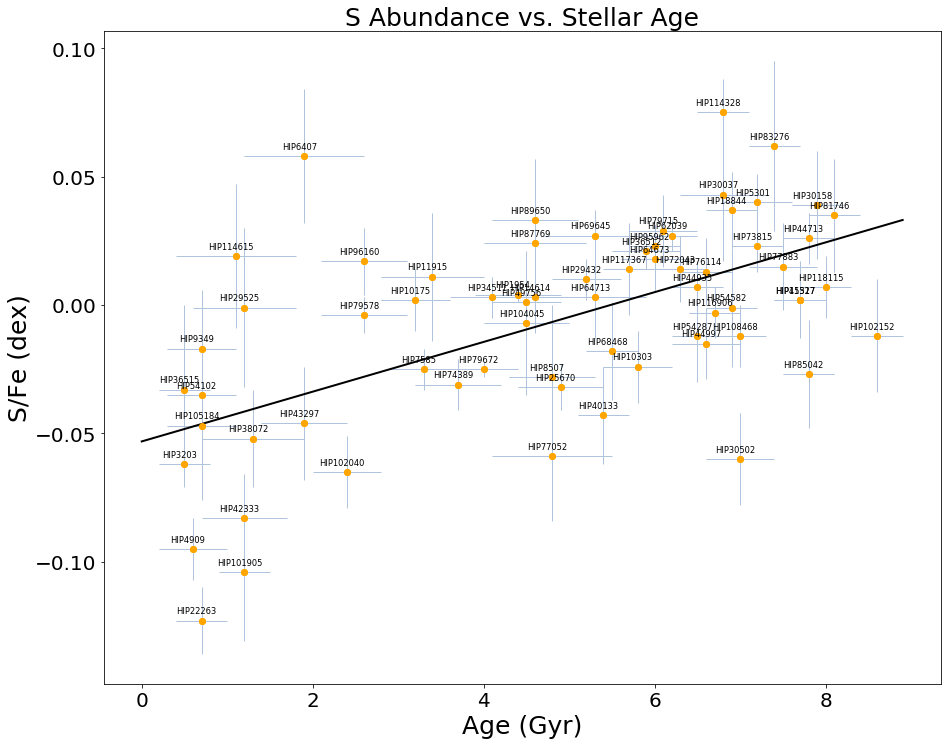

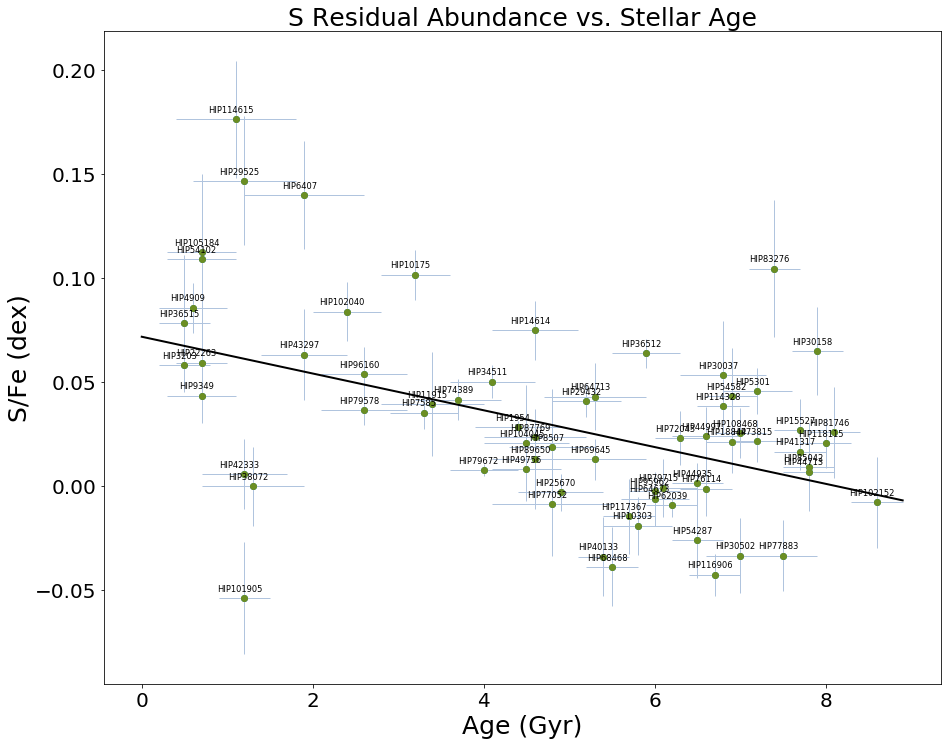

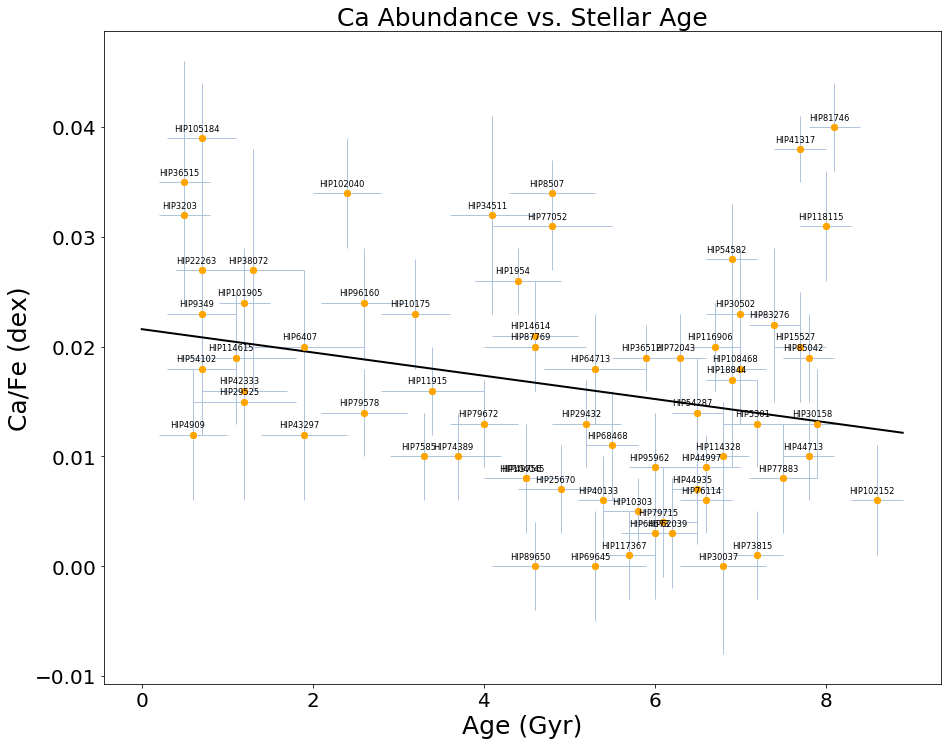

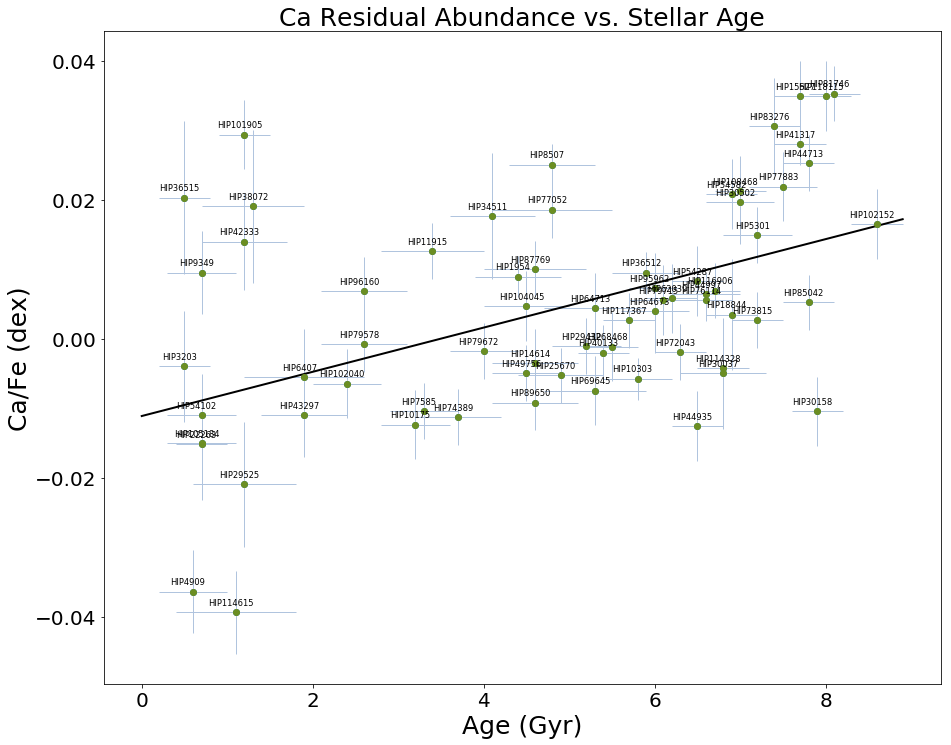

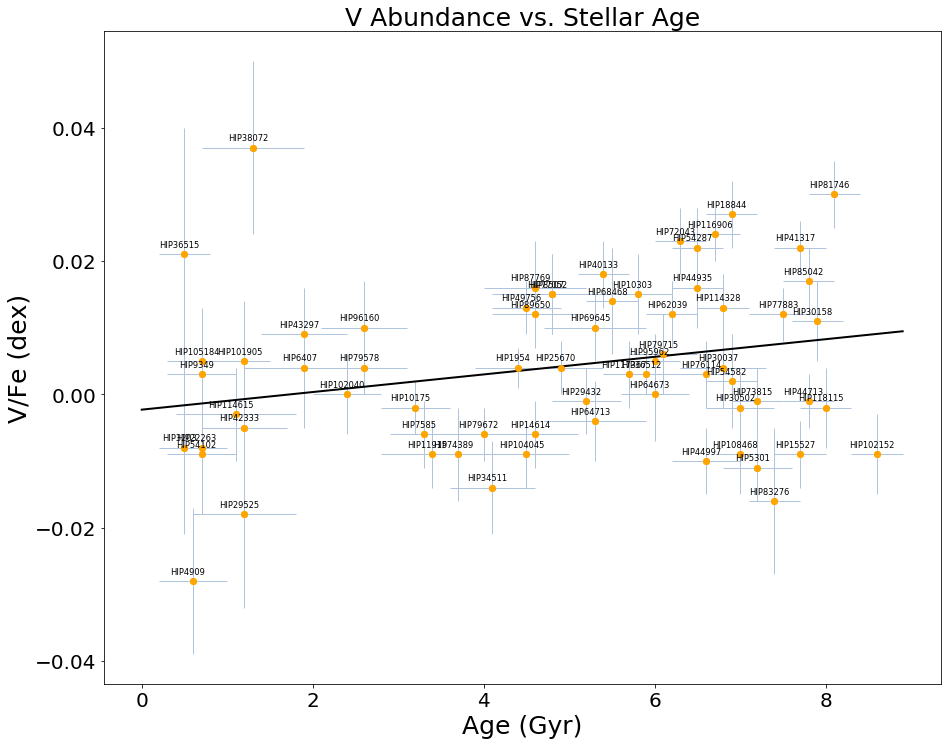

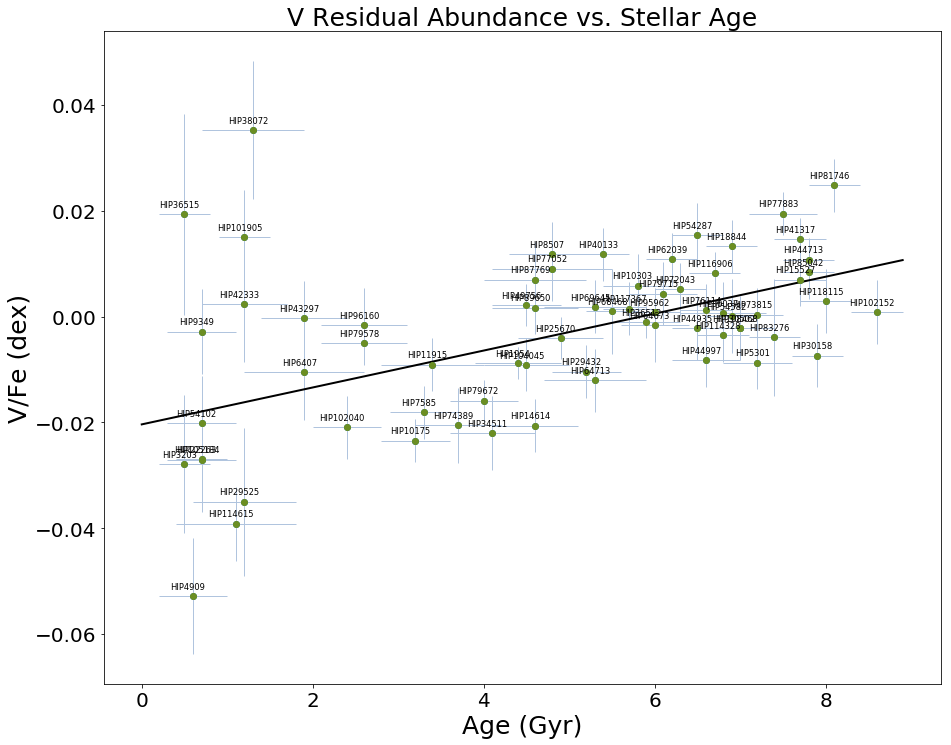

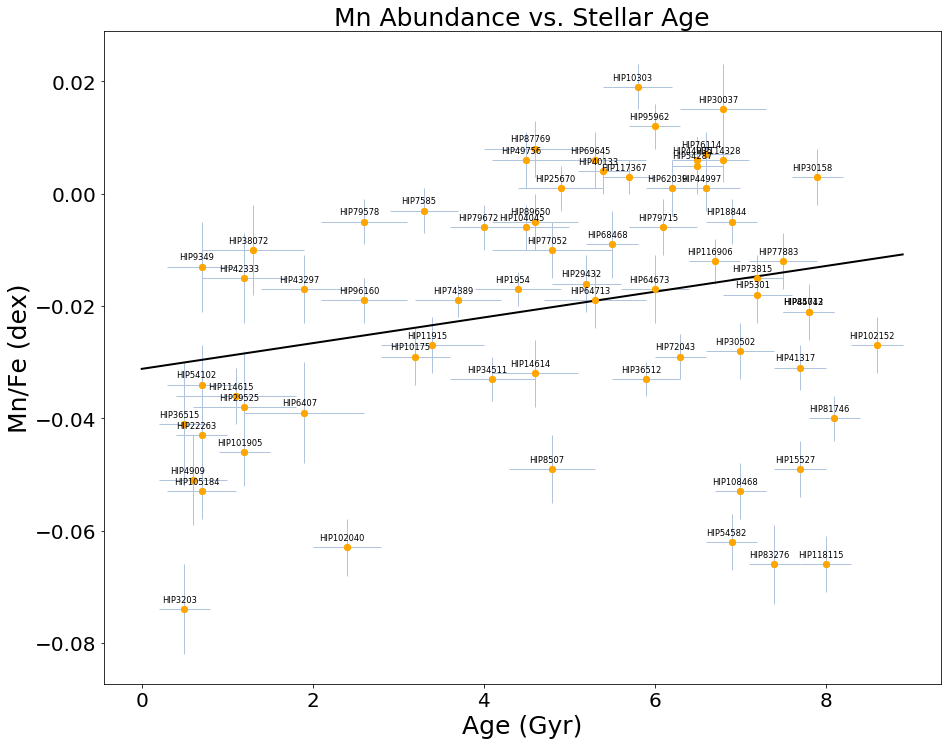

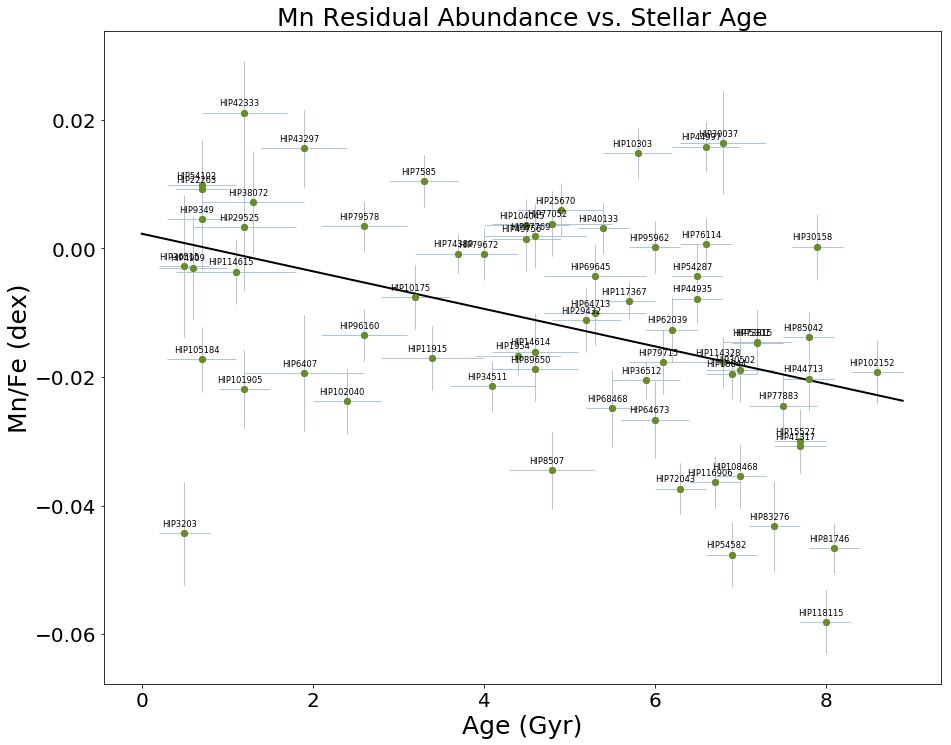

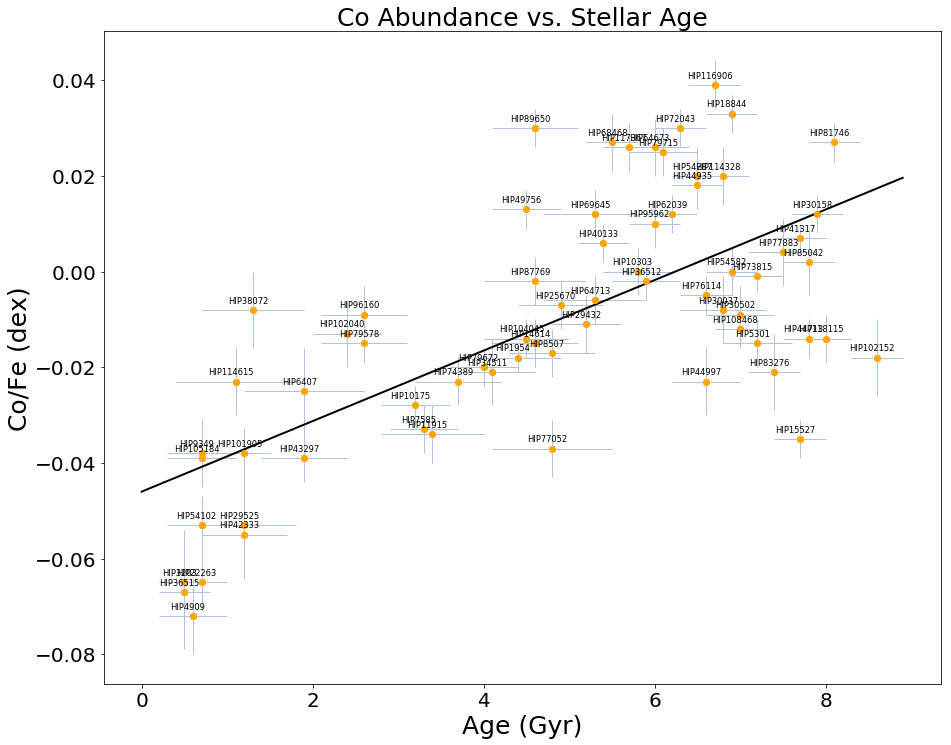

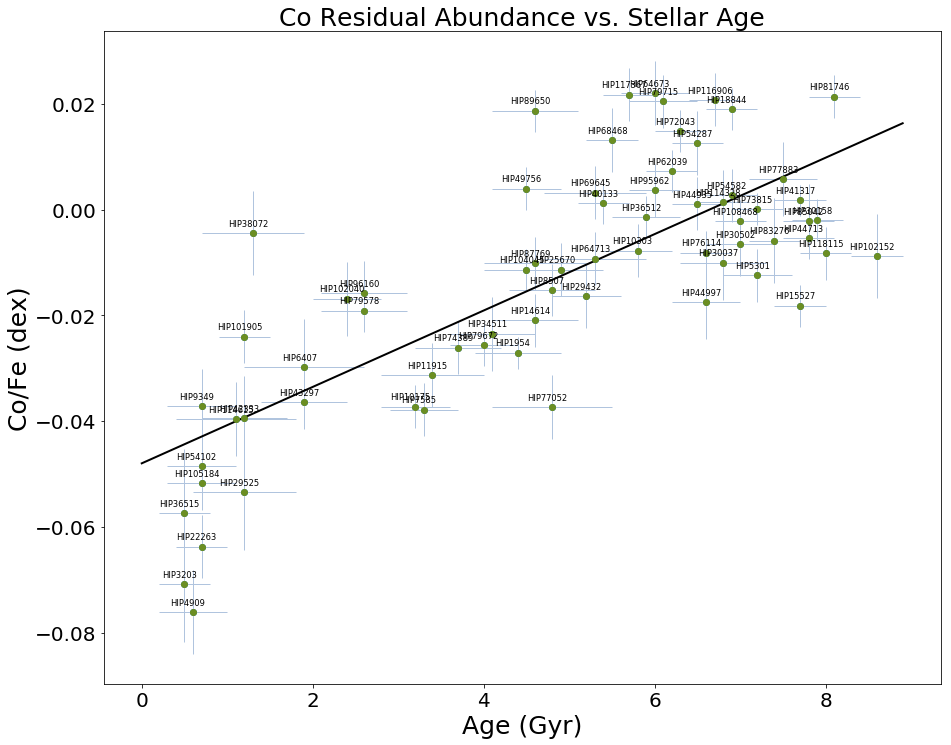

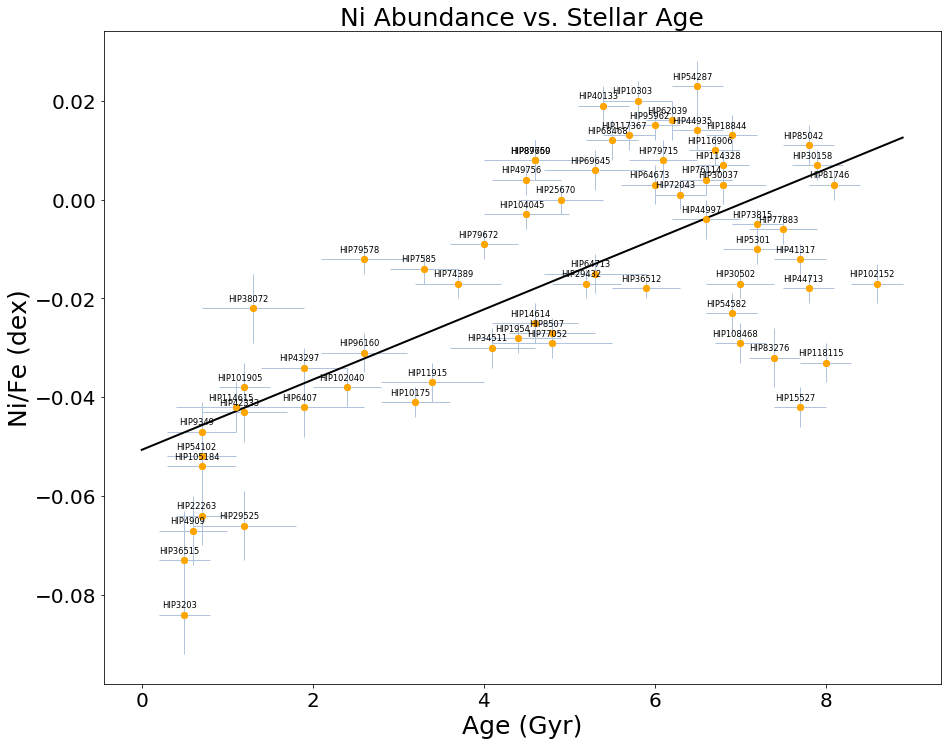

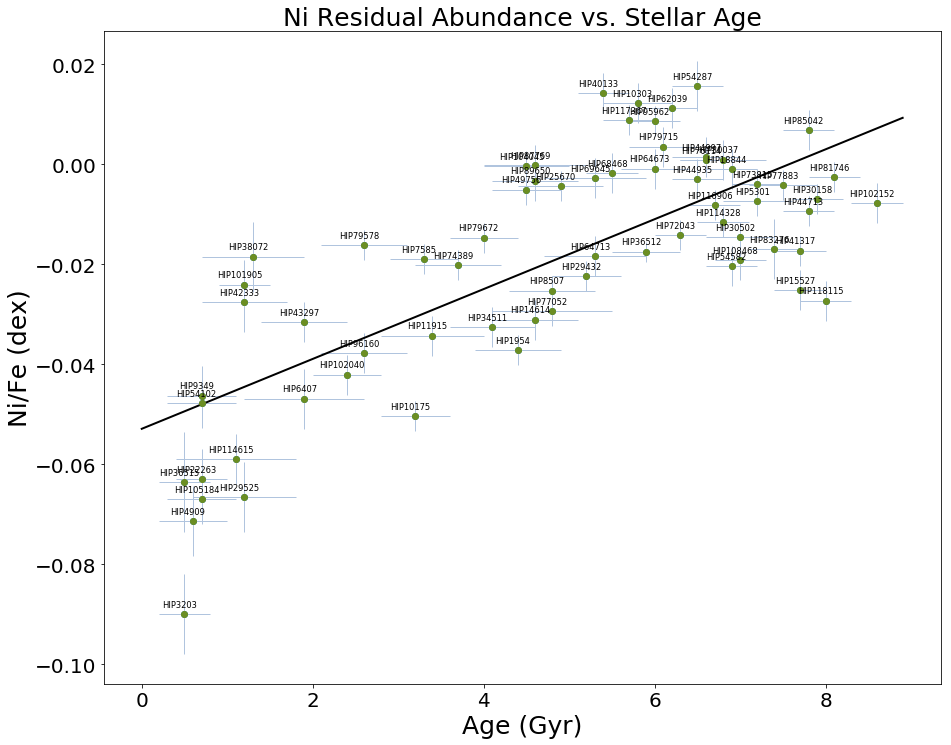

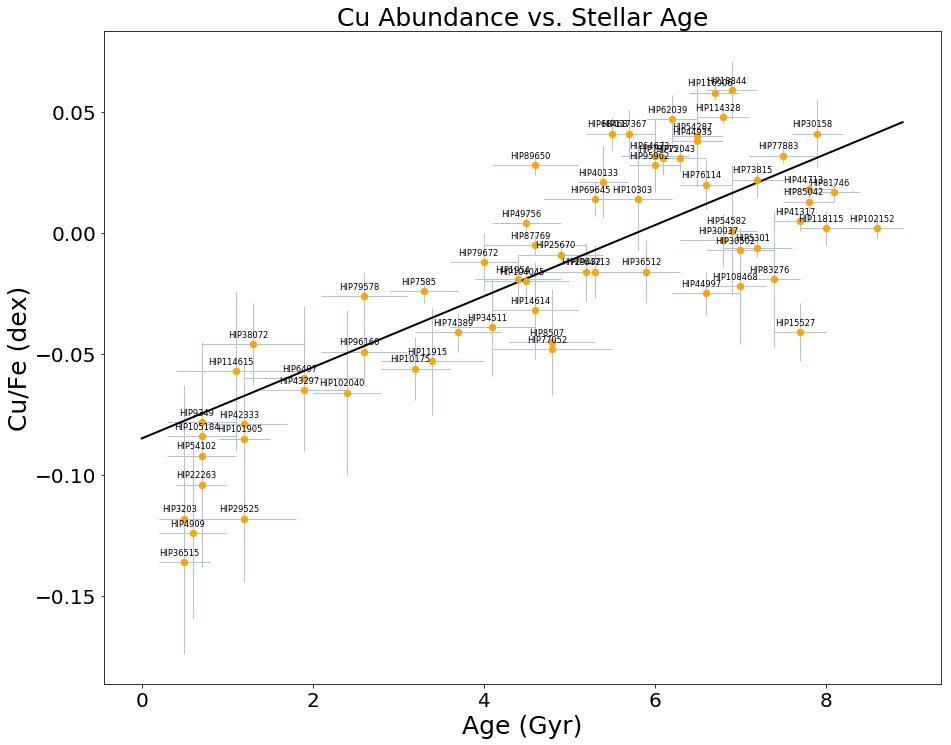

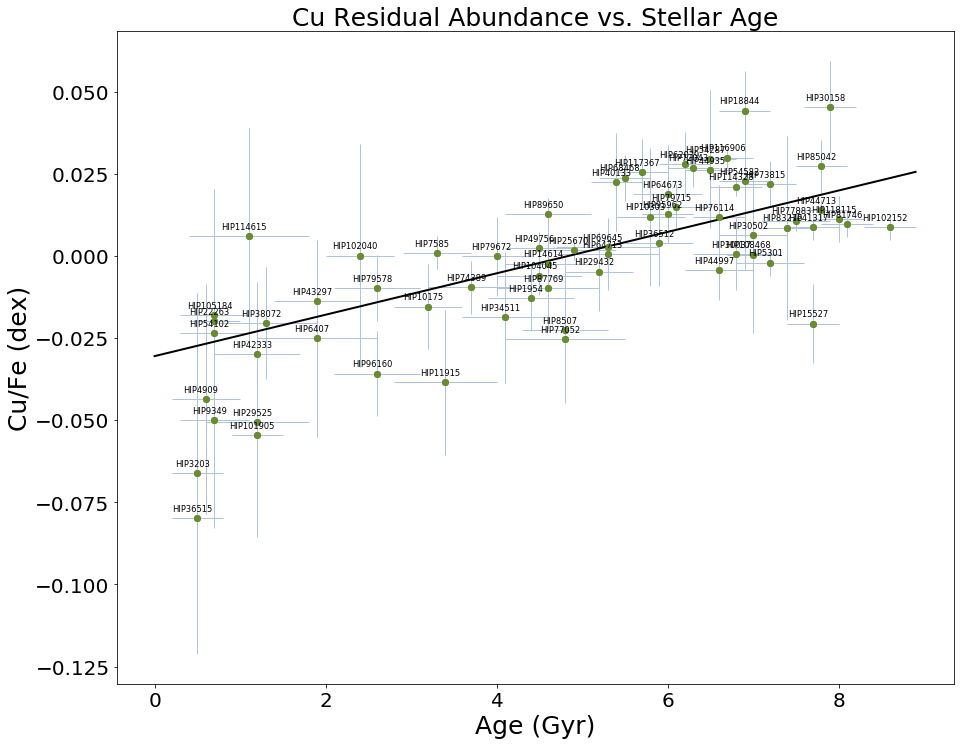

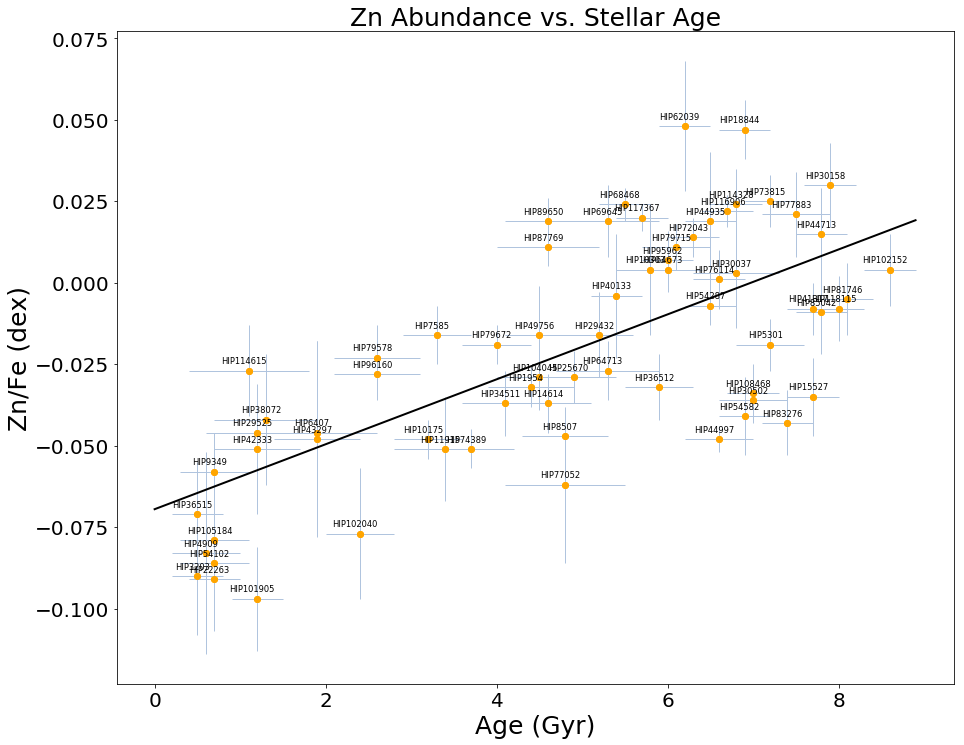

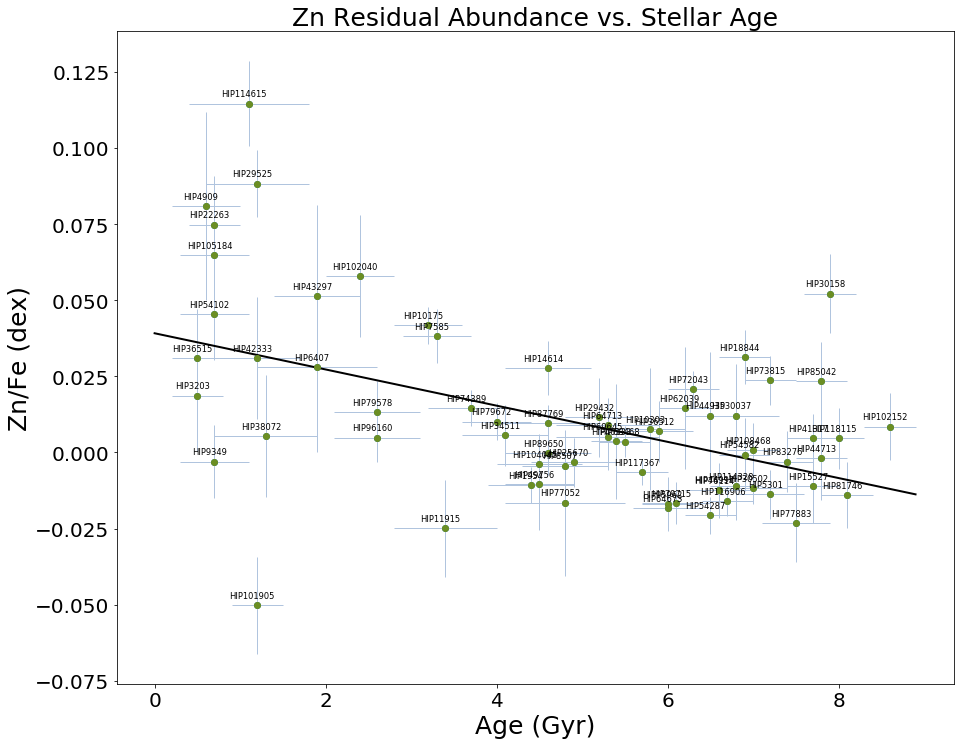

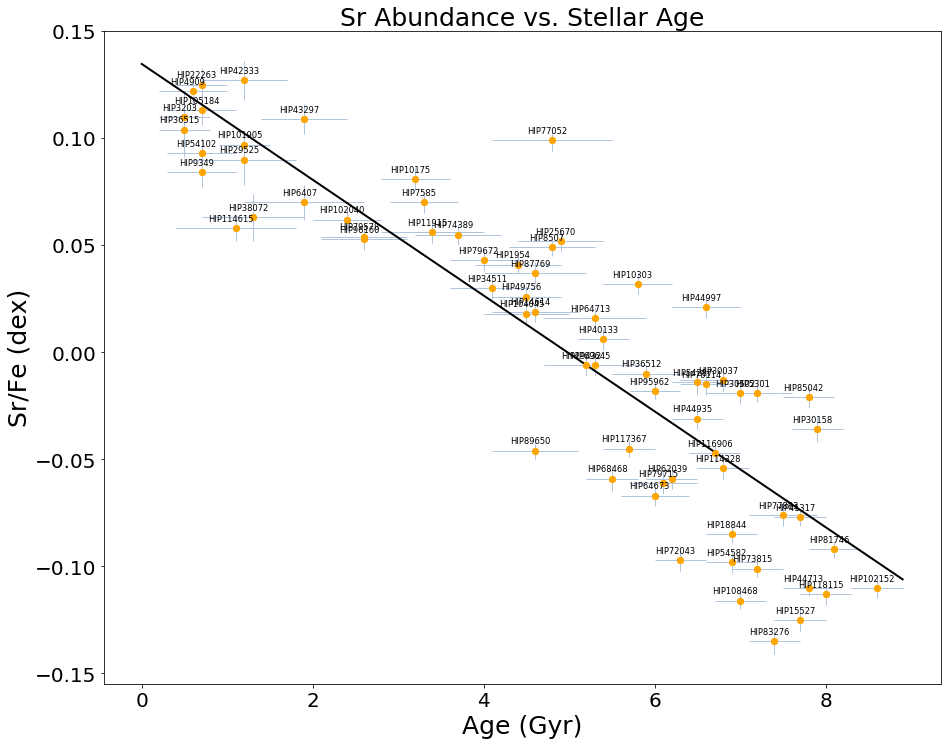

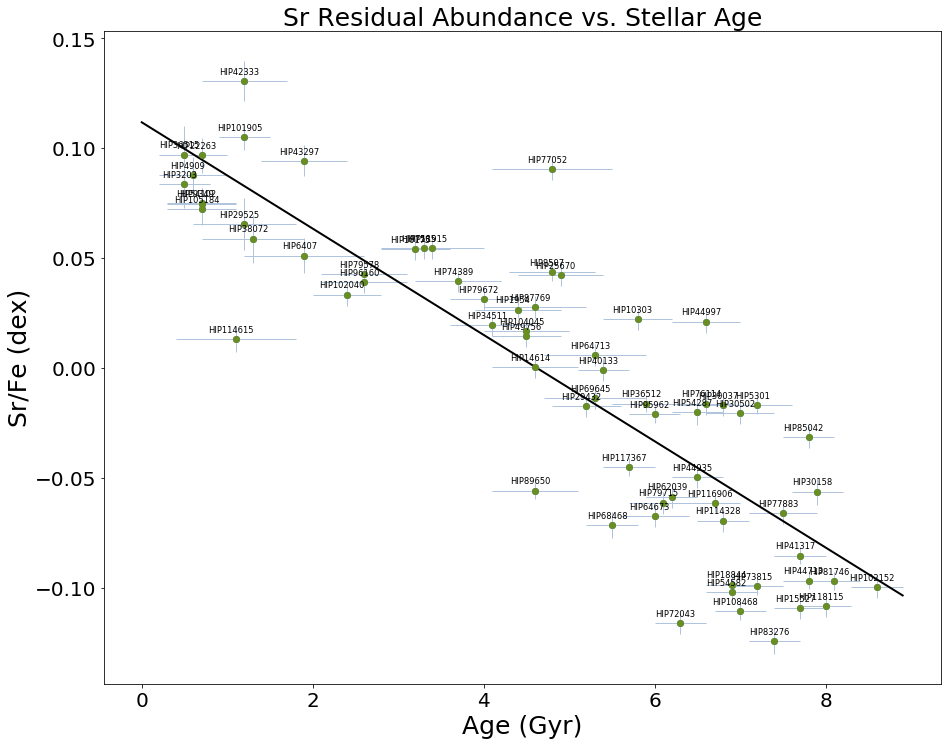

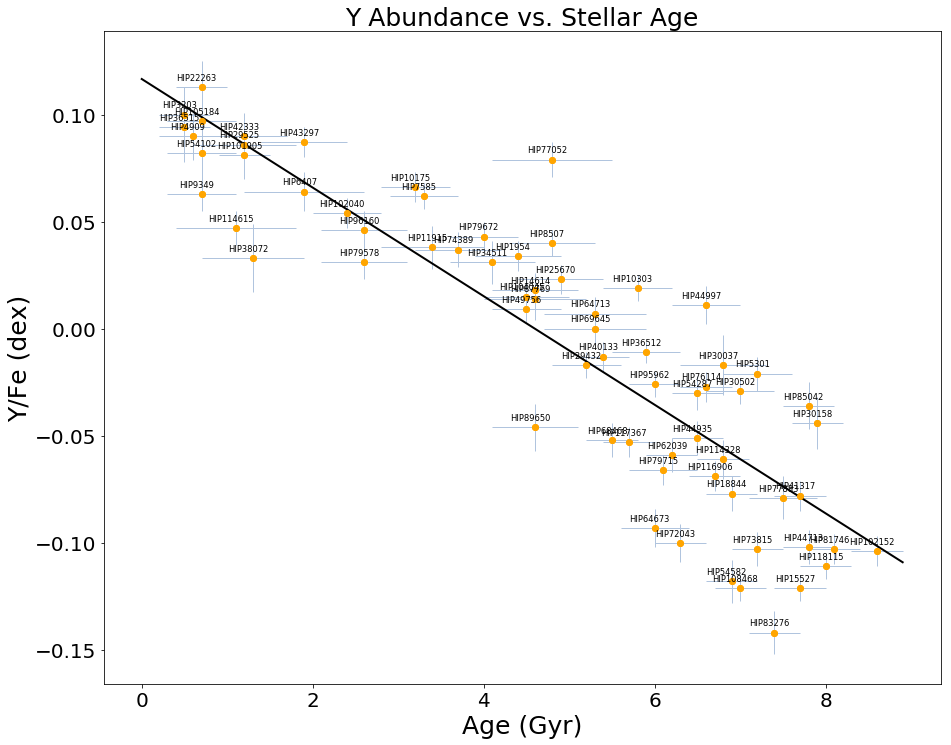

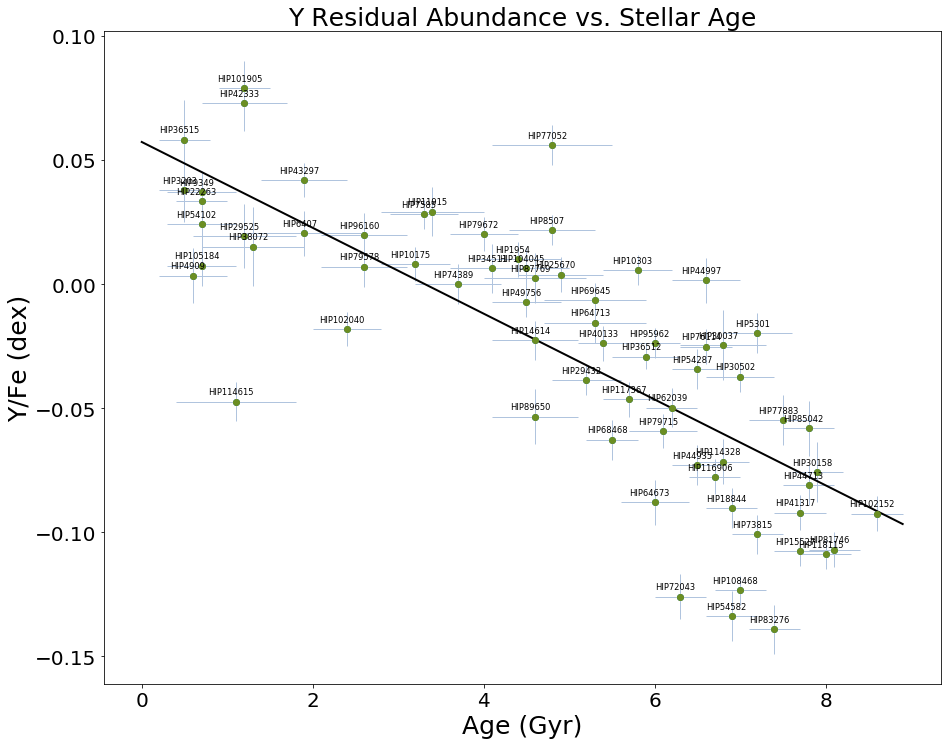

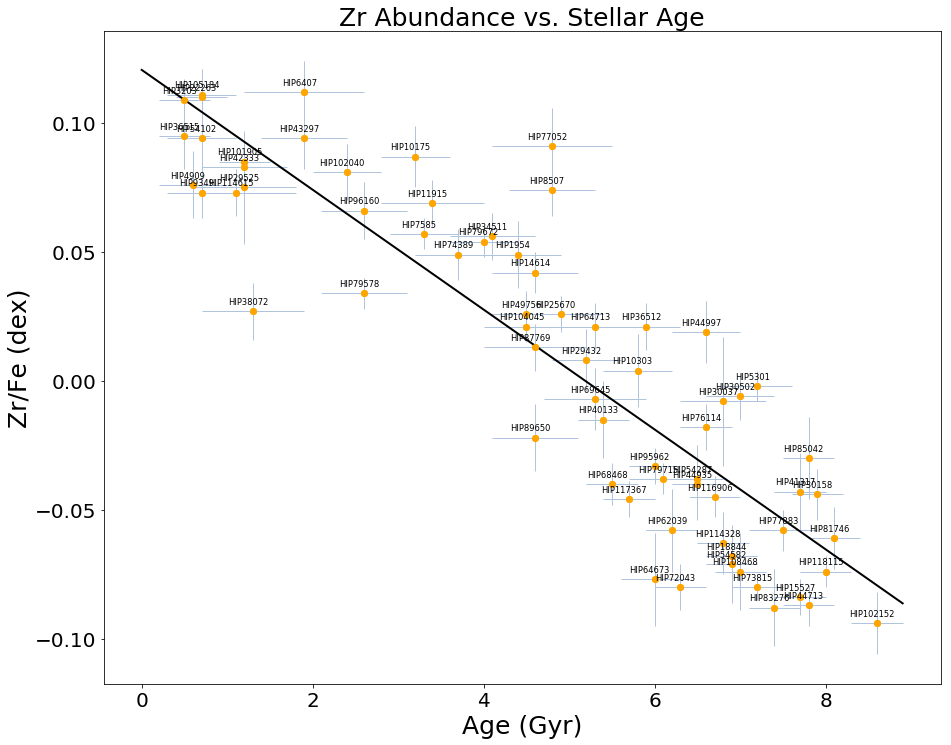

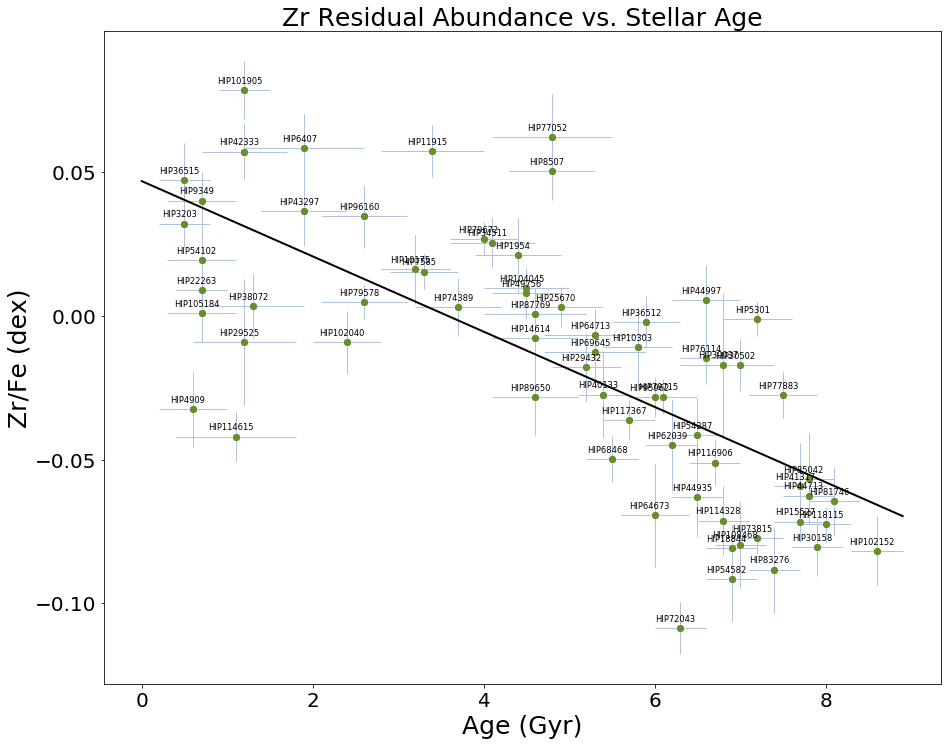

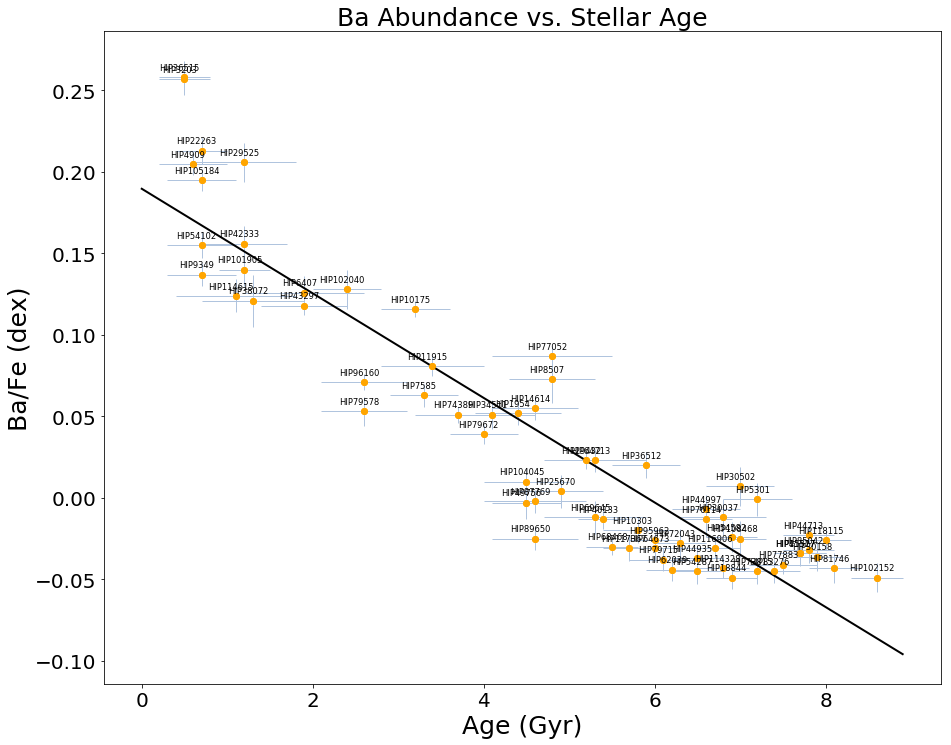

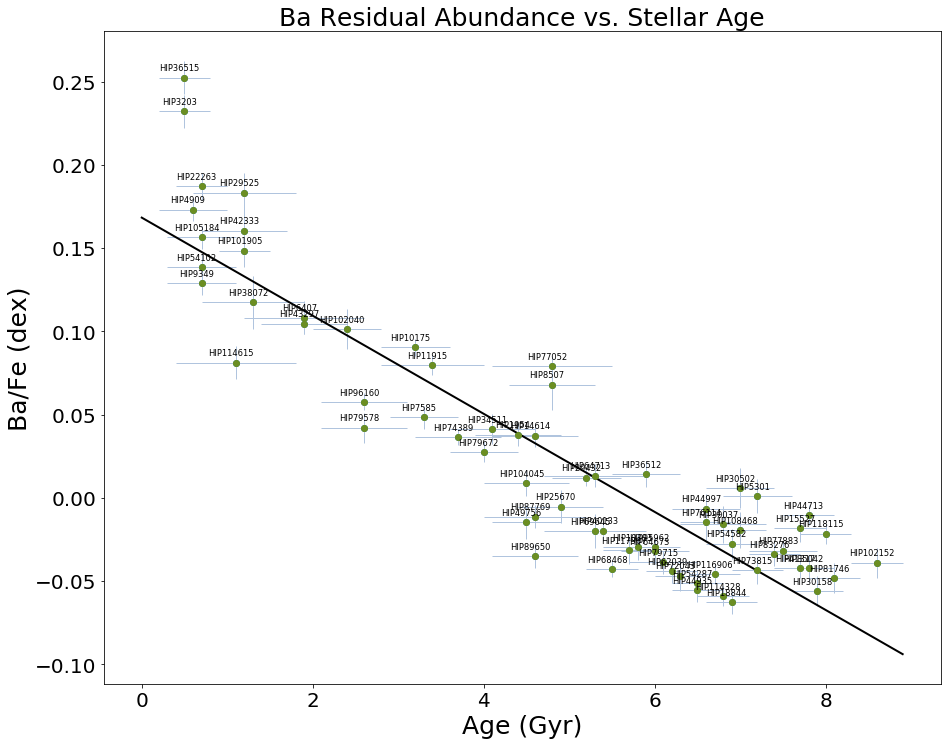

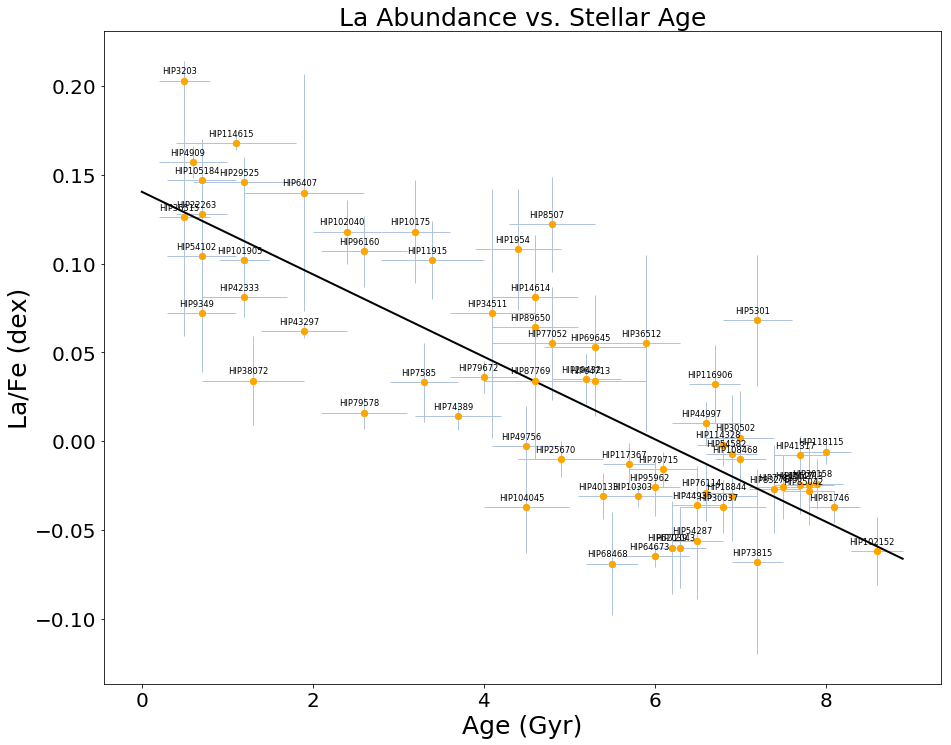

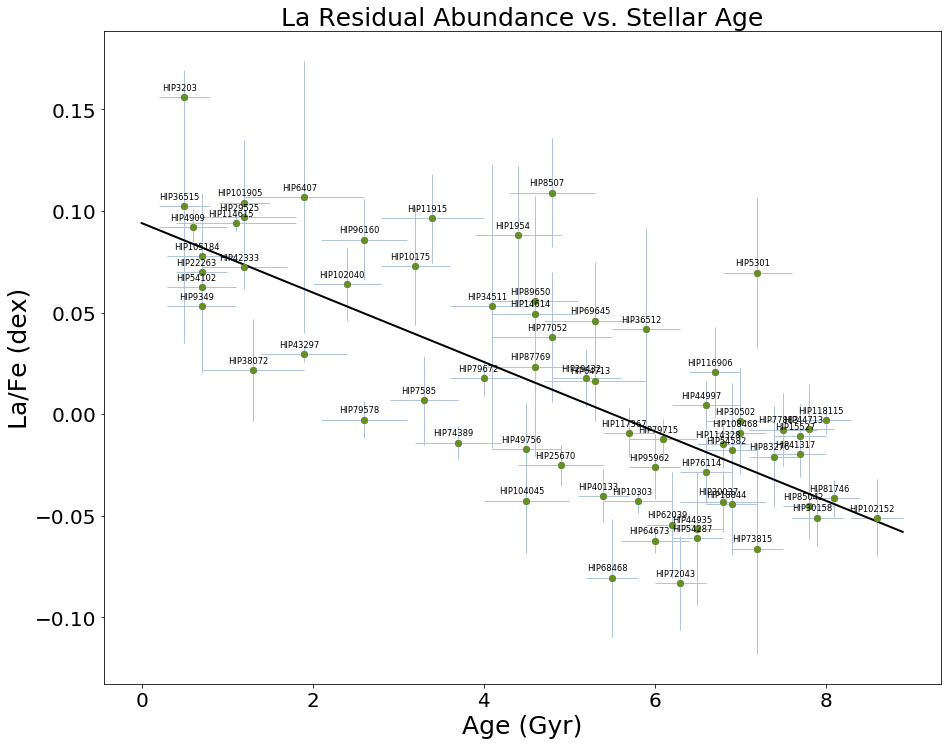

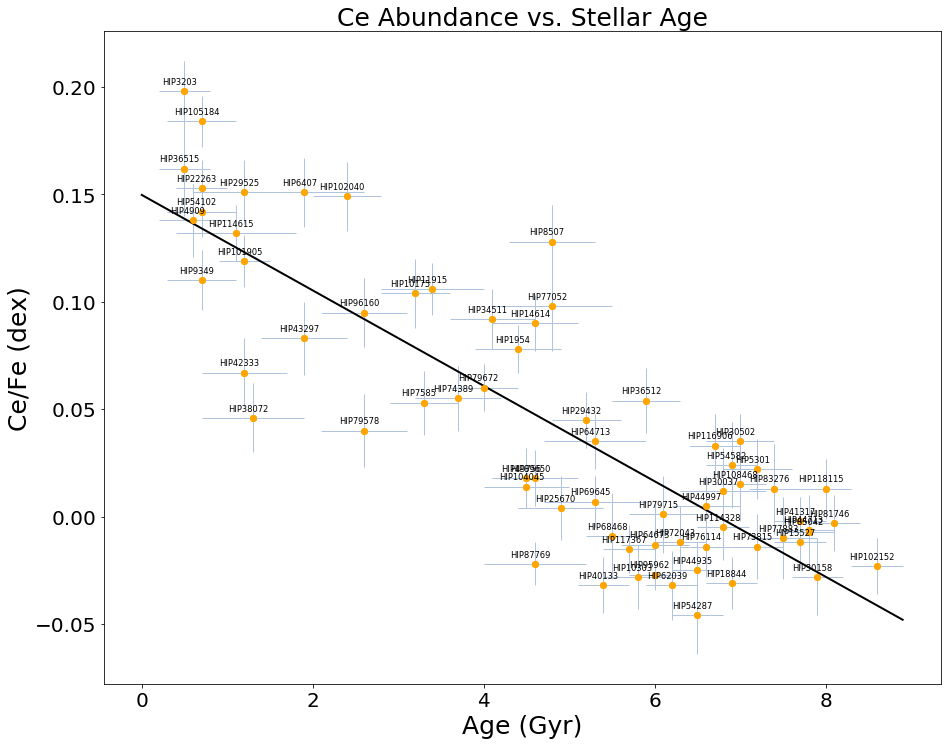

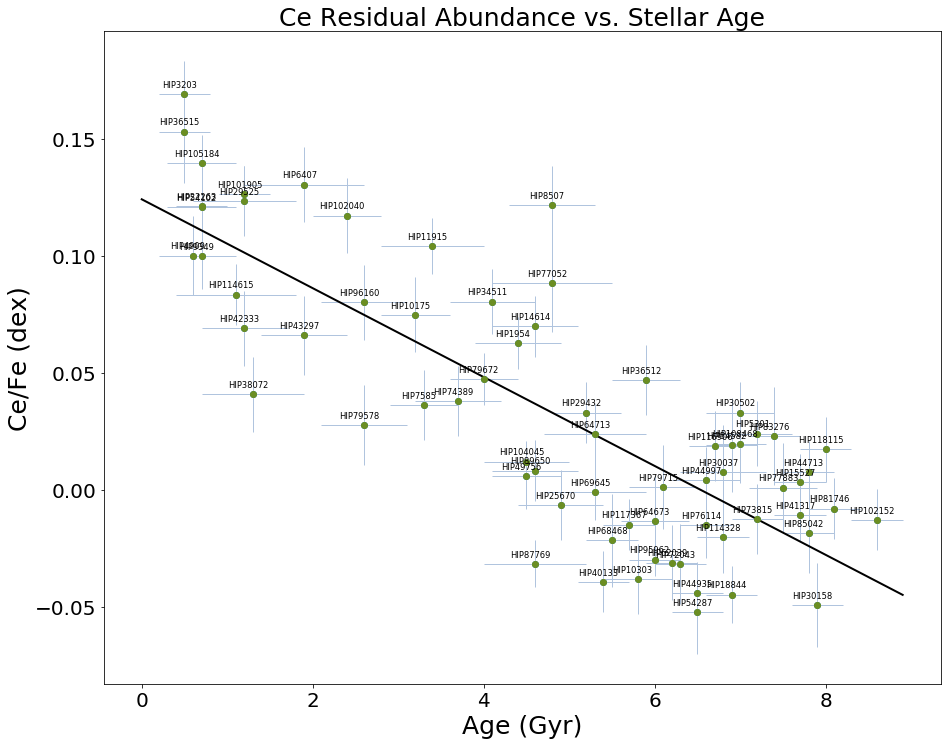

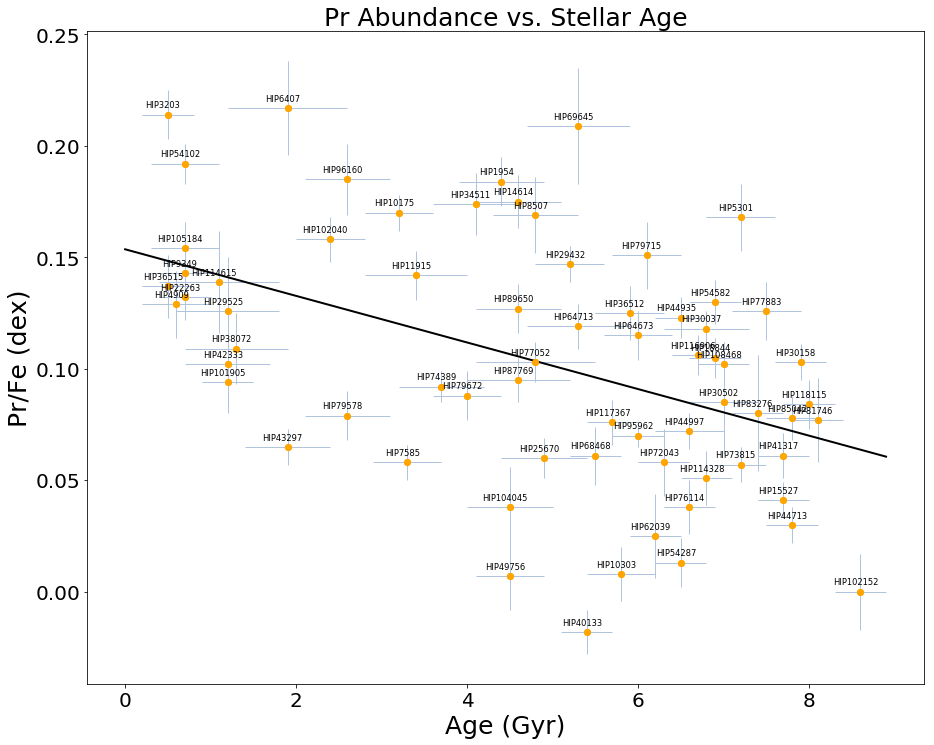

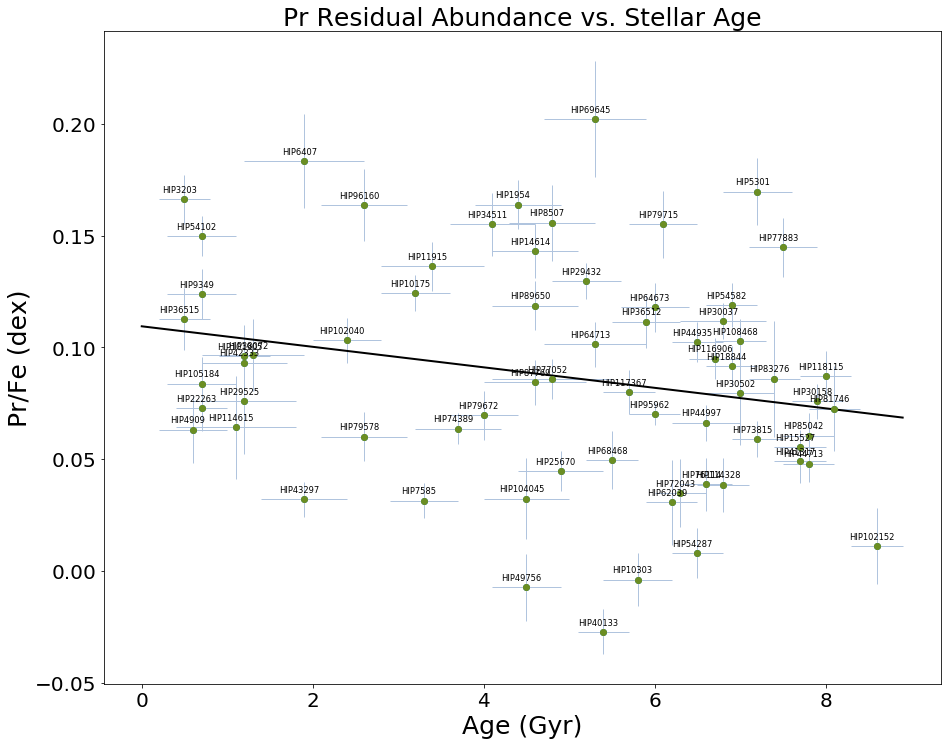

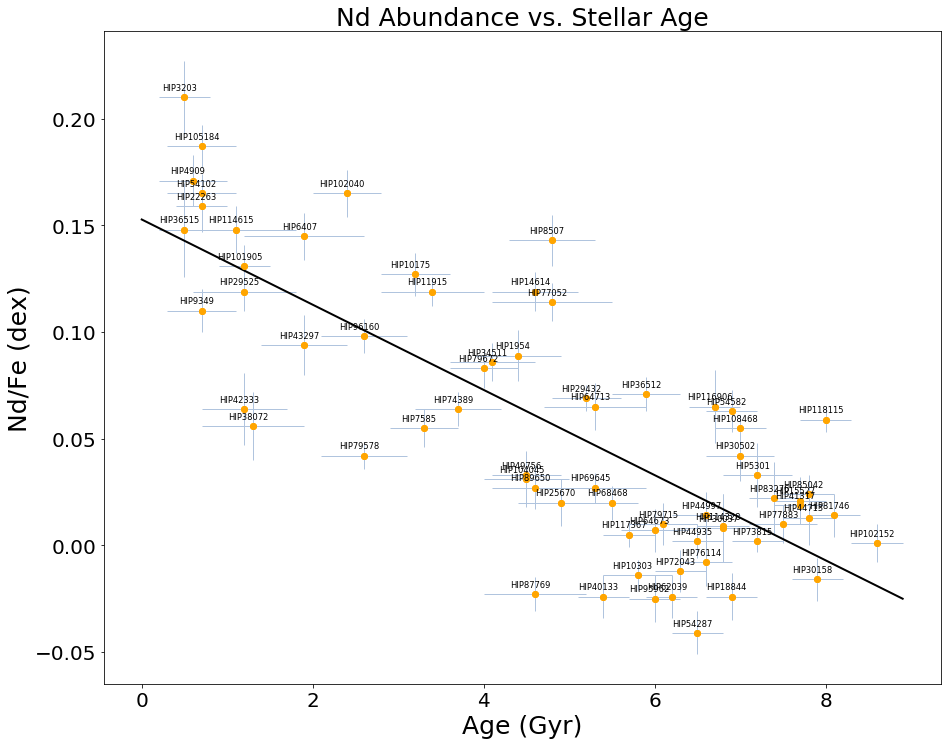

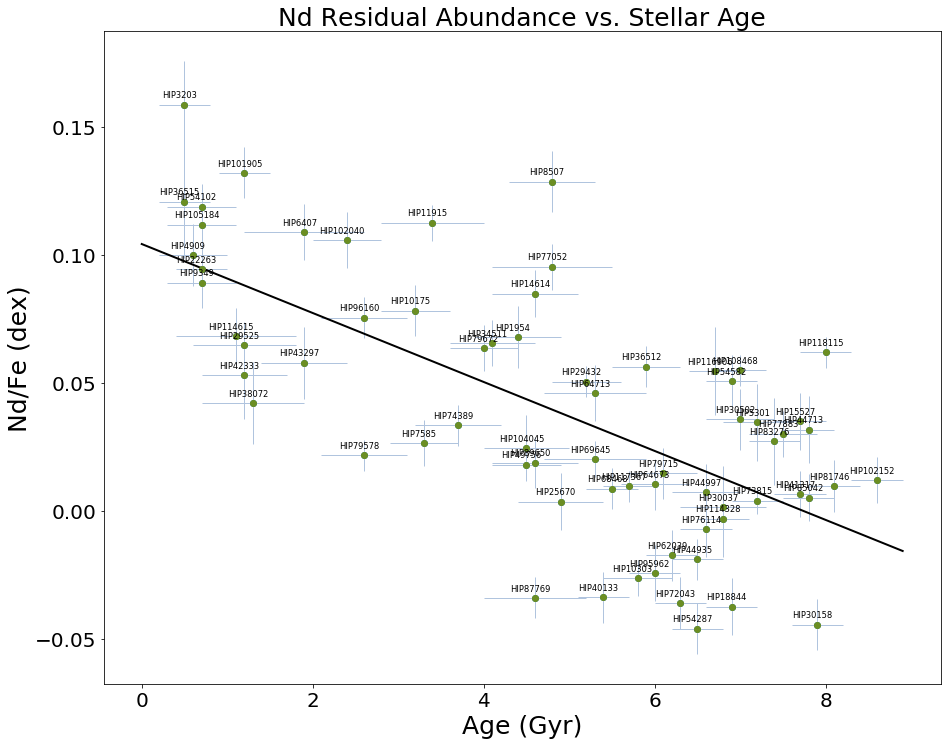

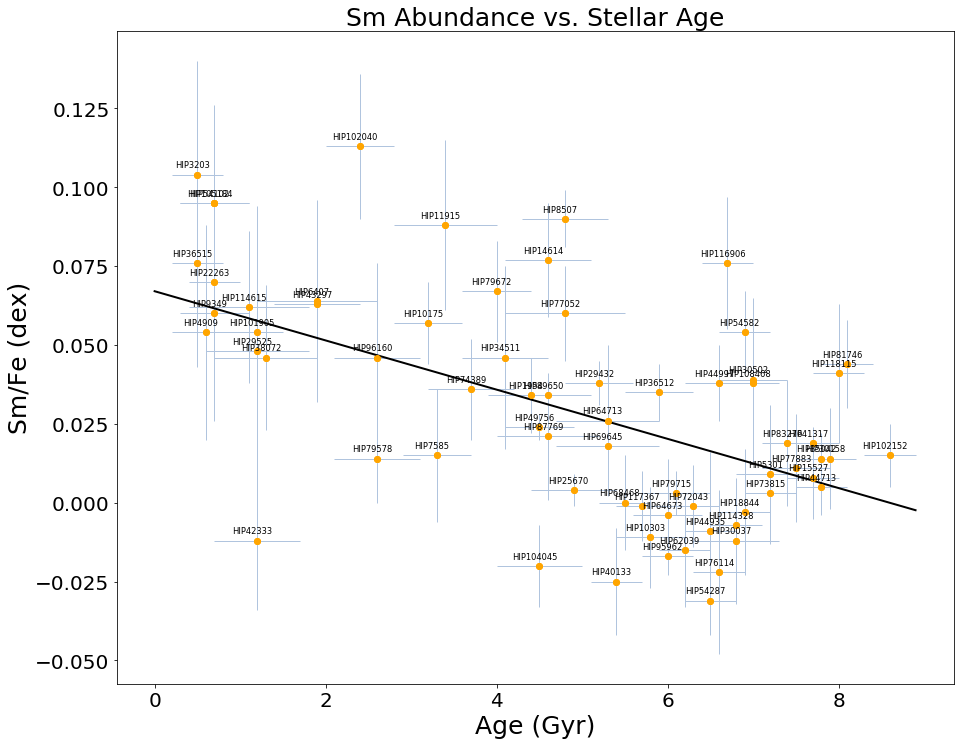

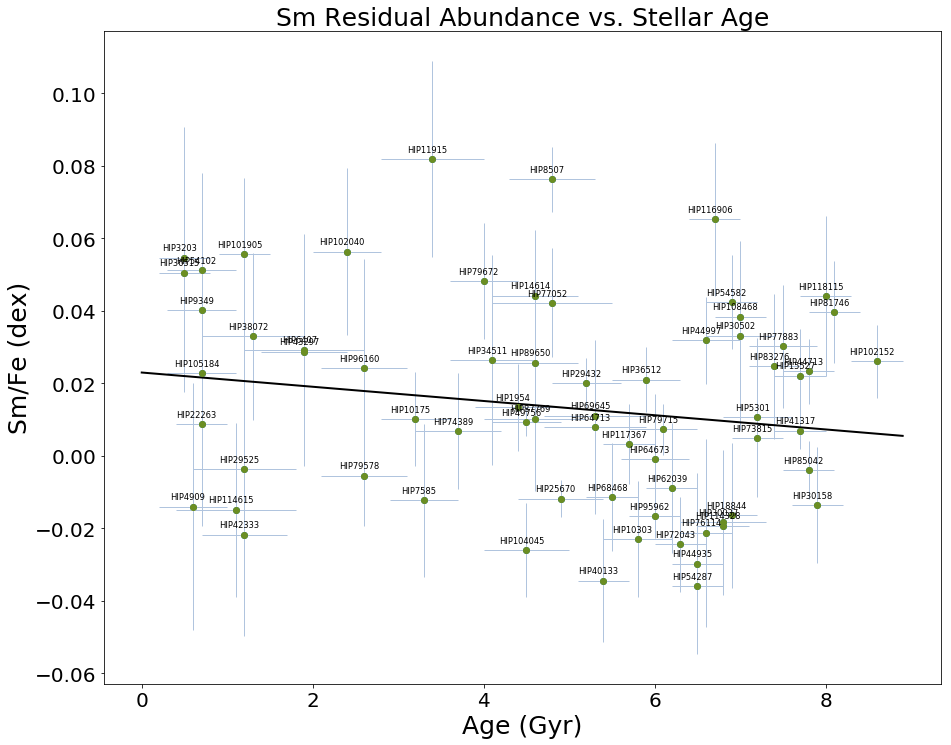

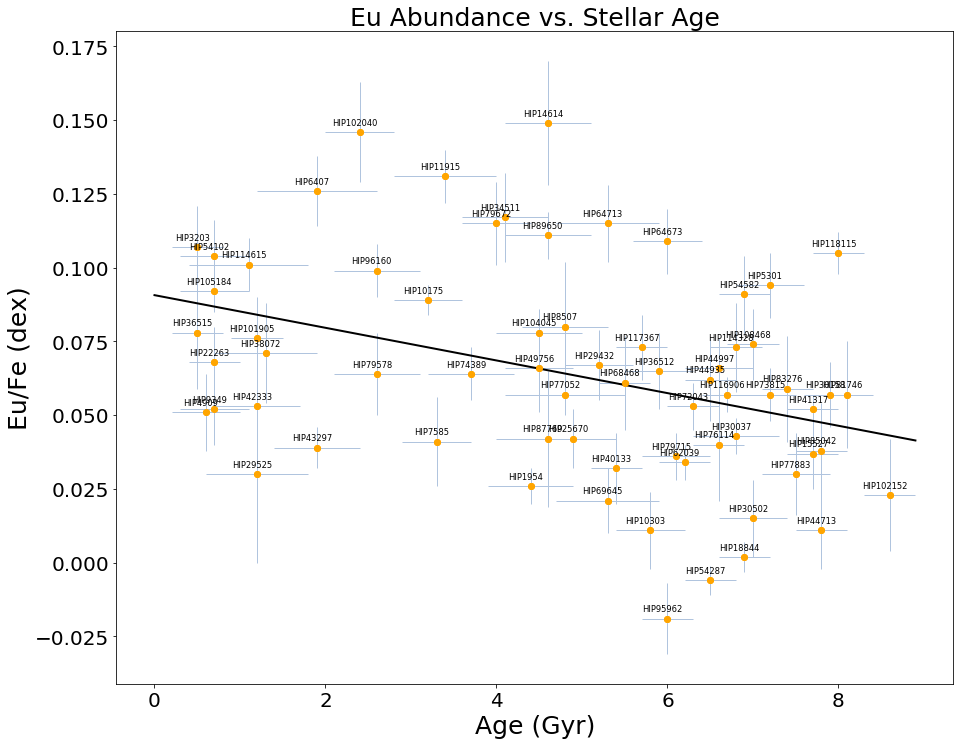

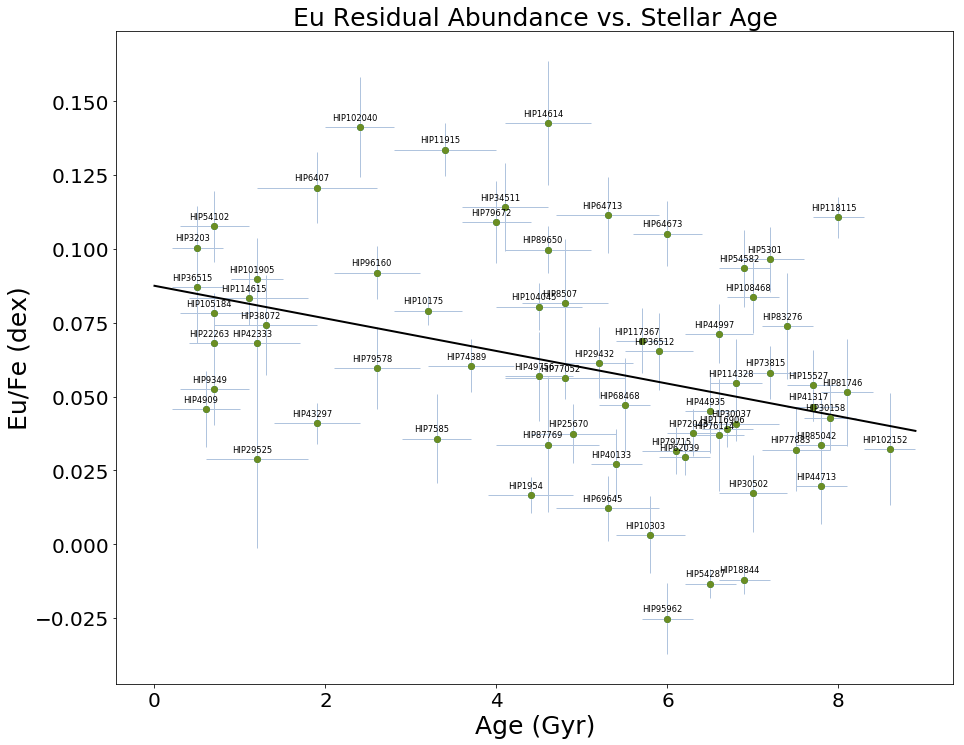

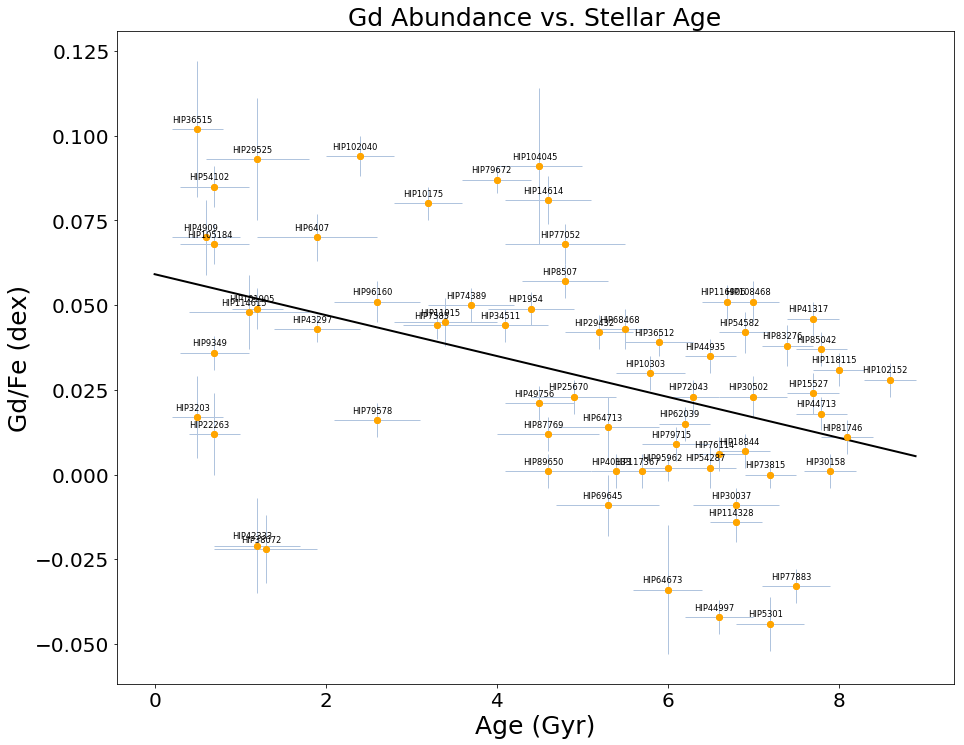

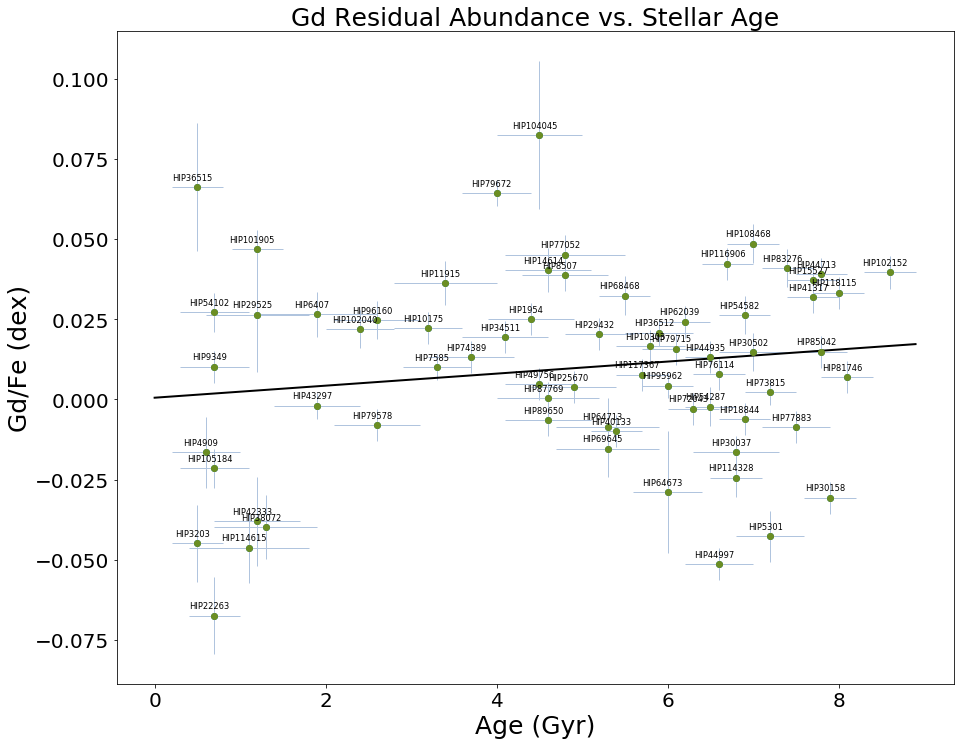

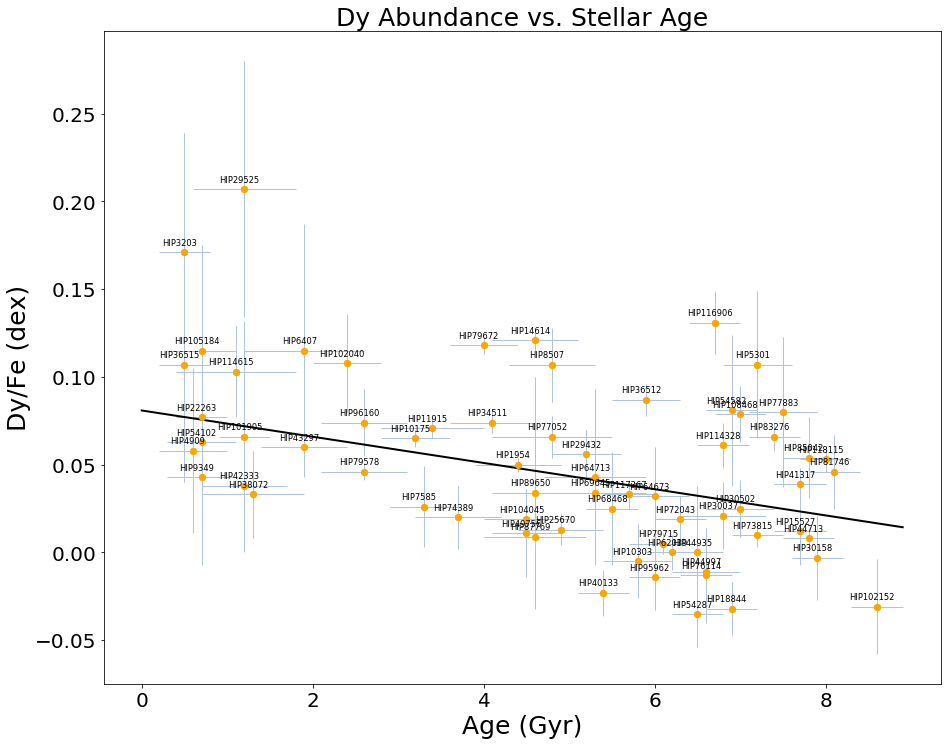

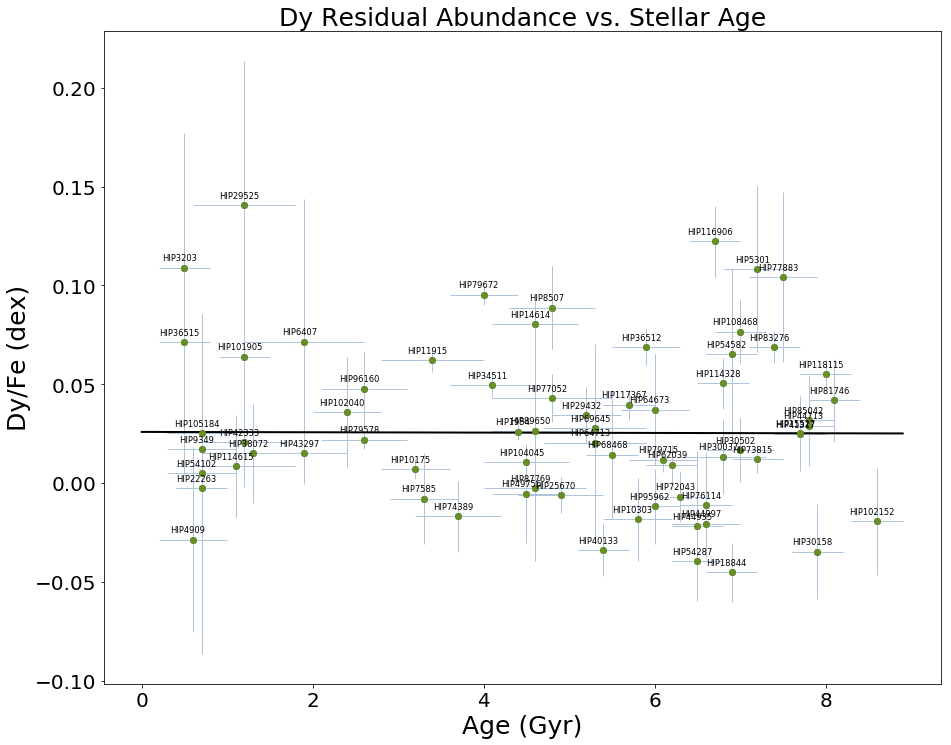

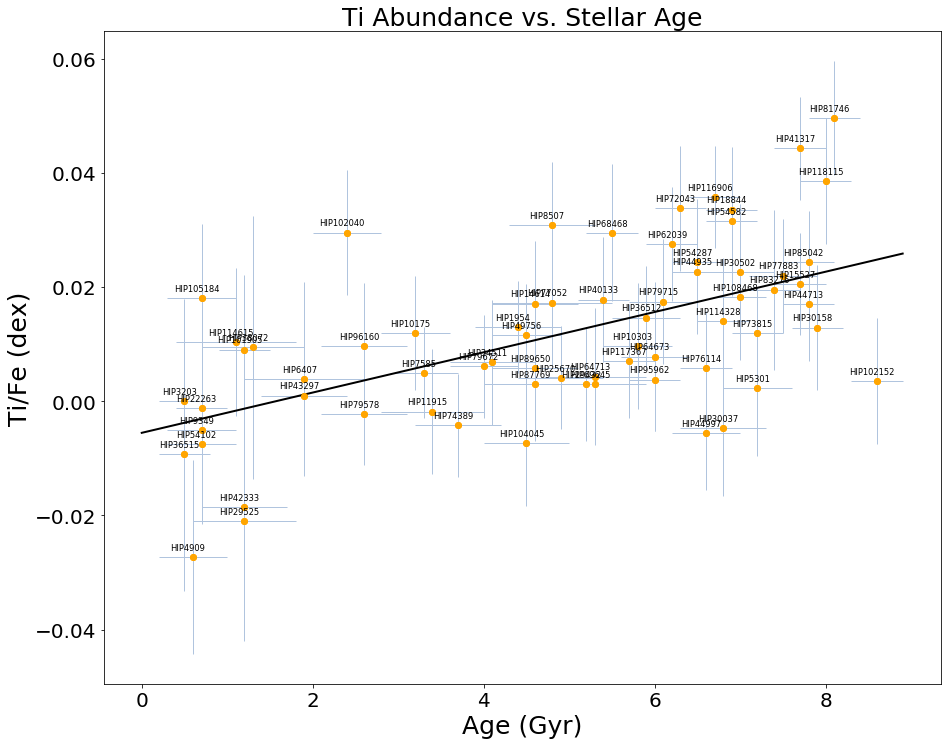

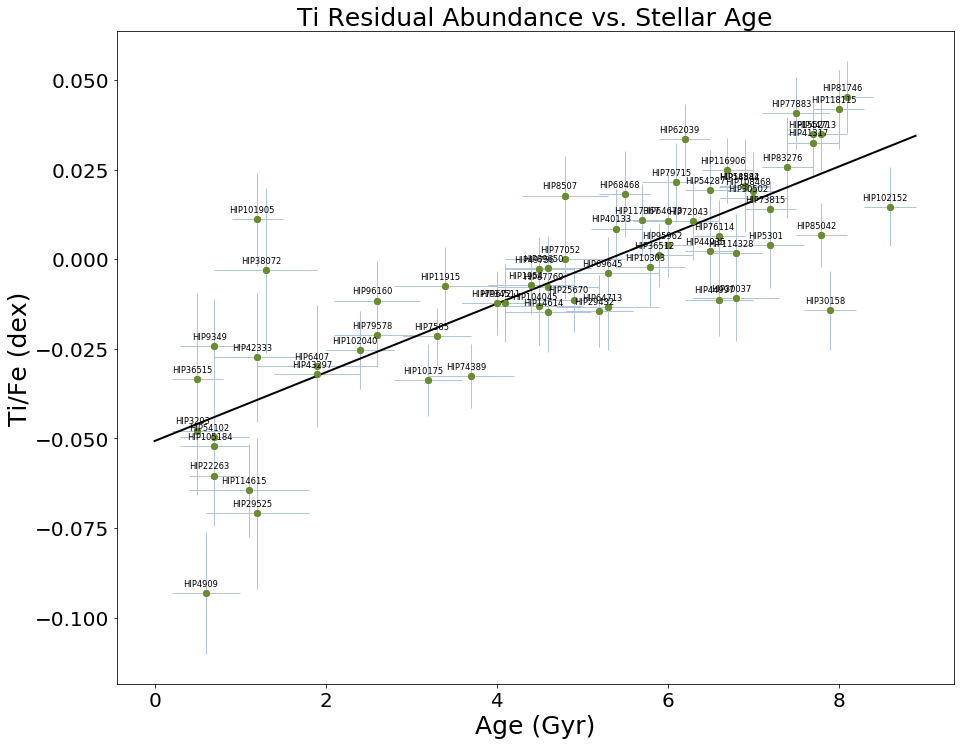

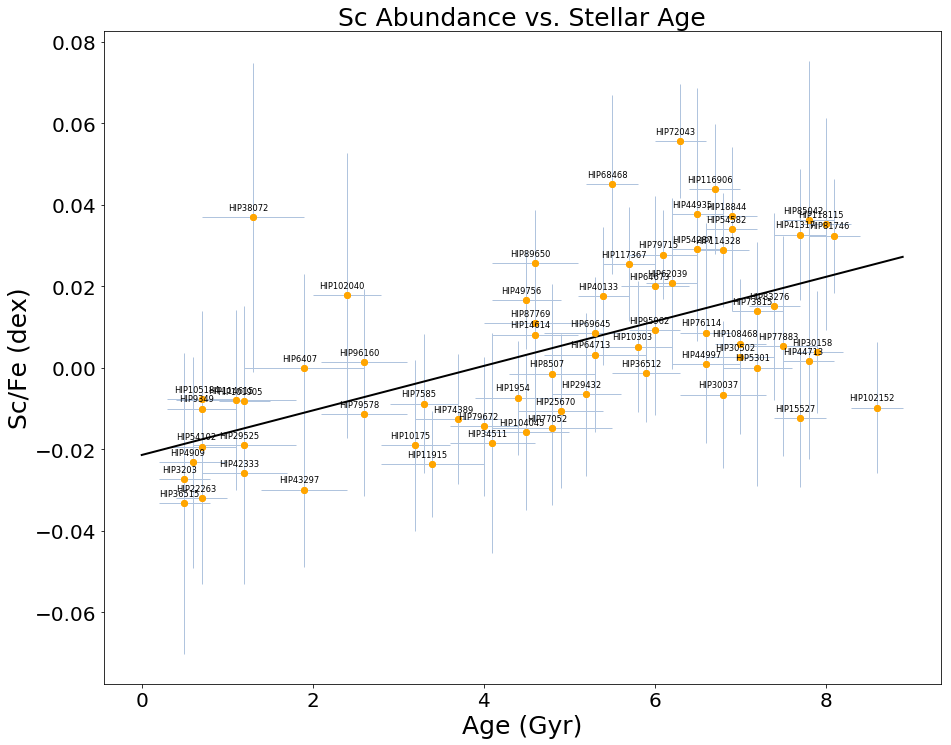

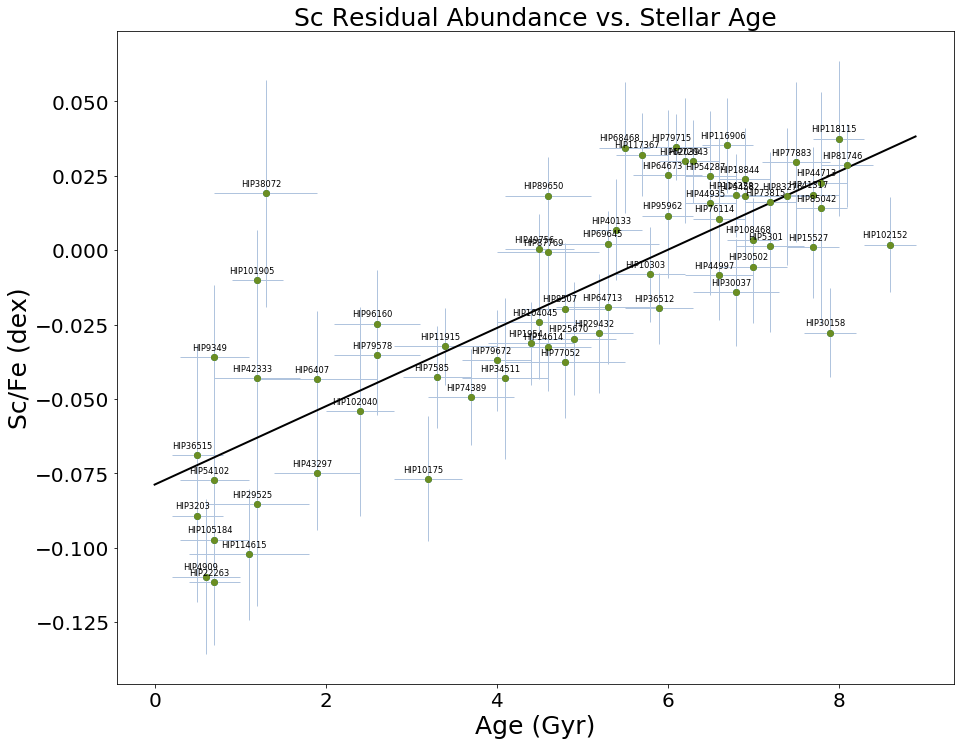

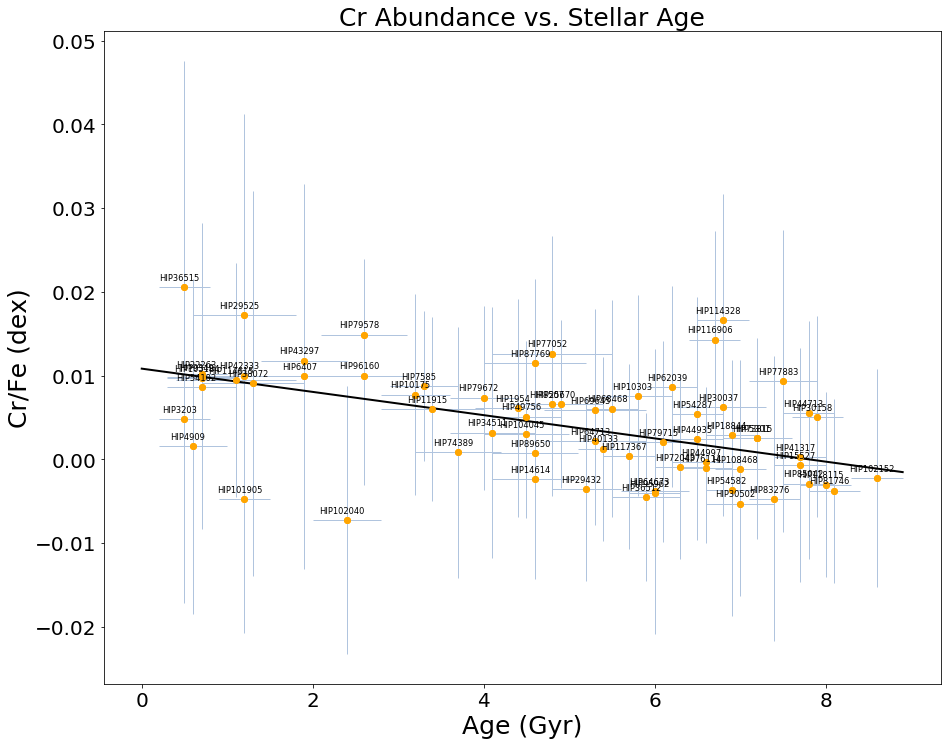

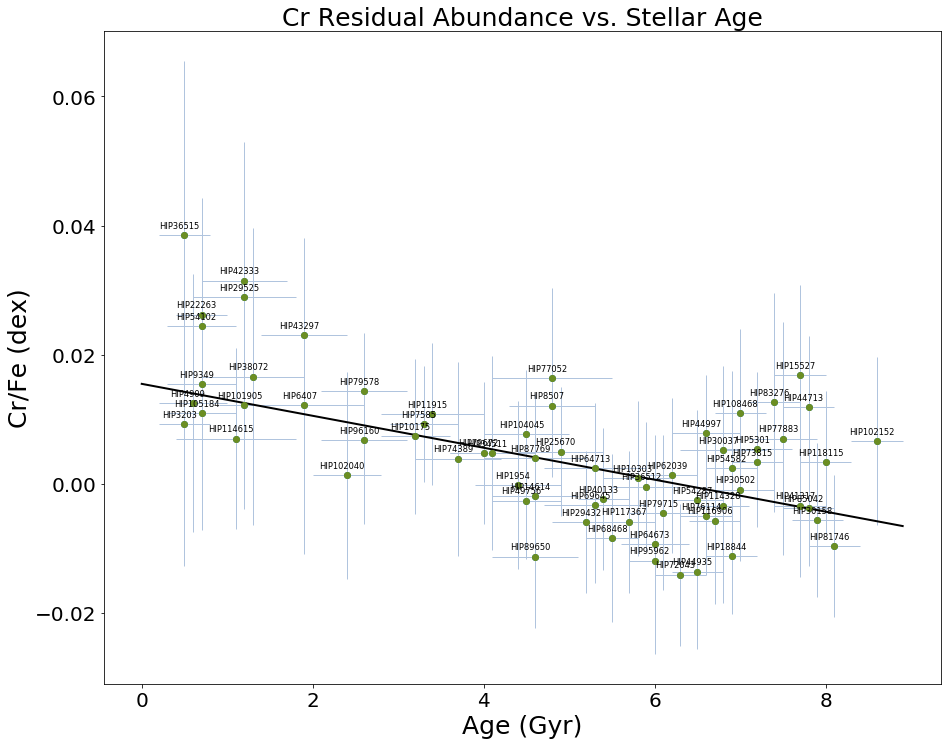

In [9]:
for ind, ex in enumerate(elements):  
    x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
    res = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t[ex],t[ex+ '_err']))
    
    plt.scatter(t['age'], t[ex], c='orange') 
    plt.xlabel('Age (Gyr)',fontsize=25)
    plt.ylabel(ex +'/Fe (dex)', fontsize=25)
    plt.title(ex +' Abundance vs. Stellar Age', fontsize=25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
        
    mbtemp= res['x']
    plot_xs = np.arange(0, 9, .1)
    plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
    
    #plt.text(3,0,'standard deviation = {0}'.format(stdev(t['Mg'])),horizontalalignment='right', fontsize=20)
         
    for i, txt in enumerate(t['star_name']):  
        plt.annotate(txt, xy=(t['age'][i], t[ex][i]), xytext = (-5,5), fontsize='small', 
        textcoords='offset points', ha='center', va='bottom')
            
    plt.errorbar(t['age'], t[ex], yerr= t[ex+'_err'], xerr= t['age_err'], fmt='o', color='orange',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

    plt.savefig(ex + 'vsage.png')
    plt.show()
    plt.close()
    
    el_con_temp = []
    for ob in table['star_name']:
        abund = np.array(star_table(ob)['Abundance'])
        con_temp = np.array(star_table(ob)['Condensation Temp'])
        error = np.array(star_table(ob)['Abundance Error'])
        residu = residuals(con_temp, abund, error)
        el_con_temp.append(residu[ind])
    
    x0 = (.1, .2, .3)
    restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'], el_con_temp, t[ex +'_err']))

    plt.scatter(t['age'], el_con_temp) 
    plt.xlabel('Age (Gyr)',fontsize=25)
    plt.ylabel(ex + '/Fe (dex)', fontsize=25)
    plt.title(ex + ' Residual Abundance vs. Stellar Age', fontsize=25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)

    mb= restemp['x']
    plot_xs = np.arange(0, 9, .1)
    plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
    #plt.text(5.5,-.1,'standard deviation = {0}'.format(stdev(el_con_temp)),horizontalalignment='right', fontsize=20)
    
    for i, txt in enumerate(t['star_name']):  
            plt.annotate(txt, xy=(t['age'][i], el_con_temp[i]), xytext = (-5,5), fontsize='small', 
            textcoords='offset points', ha='center', va='bottom')
    
    plt.errorbar(t['age'], el_con_temp, yerr= t[ex+'_err'], xerr= t['age_err'], fmt='o', color='olivedrab',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

    plt.savefig(ex + 'vsageresid.png')
    plt.show()
    plt.close()

In [10]:
#RANDOMLY ASSIGNED CONDENSATION TEMPERATURES

In [20]:
limit = 5
while limit > 0:
    con_temp_shuffle = []
    for n in elements:
        con_temp_shuffle.append(tc_map[n])
        np.random.shuffle(con_temp_shuffle)

    beforetc_shuff = []
    aftertc_shuff = []
    for index, element in enumerate(elements):
        abundance_beforetc = np.array(table[element])
        beforetc_shuff.append(stdev(abundance_beforetc))
        
        element_temp = []
        for ob in t['star_name']:
            abund = np.array(star_table(ob)['Abundance'])
            con_temp_shuff = np.array(con_temp_shuffle)
            error = np.array(star_table(ob)['Abundance Error'])
            residu = residuals(con_temp_shuff, abund, error)
            element_temp.append(residu[index])
        aftertc_shuff.append(np.std(element_temp))  
    limit = limit -1
    print(limit)

4
3
2
1
0


In [ ]:
zero = np.zeros_like(beforetc_shuff)
beforetc_shuff =np.array(beforetc_shuff)
aftertc_shuff =np.array(aftertc_shuff)
x0 = (.1, .2, .3)
res_shuff = scipy.optimize.minimize(nlnL, x0, args = (beforetc_shuff, aftertc_shuff, zero))

In [ ]:
plt.scatter(beforetc_shuff, aftertc_shuff, c='deeppink') 
plt.xlabel('Residuals',fontsize=25)
plt.ylabel('Tc Trend Subtracted', fontsize=25)
plt.title('Standard Deviation', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= res_shuff['x']
plot_xs = np.arange(0, .1, .001)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)

for i, txt in enumerate(elements):
    plt.annotate(txt, xy=(beforetc_shuff[i], aftertc_shuff[i]), xytext=(-13,-6), textcoords='offset points', 
                 ha='center', va='bottom', fontsize=15)
plt.savefig('standarddeviations_shuff.png')